# Exploratory Data Analysis (EDA)
"Exploratory analysis is performed to extract insights and comprehend the dataset.
This is the first step we need to complete as soon as we get the dataset before we get lost in the weeds.
Why do we do Exploratory Data Analysis (EDA)?
The goal is to learn more about the data set, which will help us make informed decisions throughout the project during data cleansing, function engineering, etc.
EDA will also help us to understand the relationships between features, data quality, and data visualization.
EDA is a very important first step in creating machine learning models, this step should not be ignored nor extended for a very long time. It should be quick and decisive."[-source](https://medium.com/mlearning-ai/exploratory-data-analysis-eda-89e9468bf75)

Dataset [link](https://can01.safelinks.protection.outlook.com/?url=https%3A%2F%2Fdrive.google.com%2Fdrive%2Ffolders%2F1-6sd6E3cL8uWdNeO4xiXxLbTSYXSTiVr%3Fusp%3Dsharing&data=04%7C01%7Carash.gholami%40queensu.ca%7C92b180b5b67d475fb70e08d87b7f4305%7Cd61ecb3b38b142d582c4efb2838b925c%7C1%7C0%7C637395133804367020%7CUnknown%7CTWFpbGZsb3d8eyJWIjoiMC4wLjAwMDAiLCJQIjoiV2luMzIiLCJBTiI6Ik1haWwiLCJXVCI6Mn0%3D%7C1000&sdata=1ieR3E8llMblC0QMBtx1%2FpHS71RQuCxzdNQLmH0HJVU%3D&reserved=0)

Explanation: There are **49** users' data here. Naming is in the format of Username_ExperimentNumber. Please also note that it is unprocessed raw data, which includes a lot of noise etc. 

Experiment-1: **20** participants are involved in this task and the participants were asked to type **a story** from **a set** of short and simple stories from the American Literature https://americanliterature.com/100-great-short-stories for **four minutes**. The story was chosen randomly by the participants.

Experiment-2: 20 participants are involved in this task and for this data set, all the participants were asked to type the **same text** https://en.wikipedia.org/wiki/The_Adventures_of_Tom_Sawyer for **four minutes**. For each participant, almost the same amount of data is collected as Experiment-1. This dataset is important to be able to measure the quality of the features. The collection of this dataset is quite realistic since in a real case the users could be also asked to type a given text during their CA sessions. 

Experiment-3: The participants are asked to type **10 different pangram sentences**. Pangrams sentences contain** all 26 letters** of the alphabet. This data set is used to test how the **letter distribution** of text affects the result.

Experiment-4: **34** participants are involved in this task and the participants were instructed to imitate someone else's typing pattern by watching the prerecorded video of the other person. For these experiments, one of the participants was recorded on video while typing a short and simple sentence for **15 seconds** from a perspective that the hand motions, smartwatch, keyboard, and the screen could be seen. Although it was not required, the perspective allowed to infer what the victim was typing by watching. This dataset was primarily used to analyze the **attacking scenarios**. It is left to the participant to type the exact same text or imitate the hand movement of the victim.

-----------------------

I realized that you have mostly 4s and 10s as values on column A, but I also found 2s. What does column A represent? 
A represents the sensor type:
 
**10 for the accelerometer
4 for the gyroscope**
2 for the magnetic field sensor

You can find more info about sensors and constant values that are used to define the sensor type in these links:
- https://developer.android.com/guide/topics/sensors/sensors_overview
- https://developer.android.com/reference/android/hardware/Sensor#TYPE_LINEAR_ACCELERATION

Normally, I only collected and used accelerometer and gyroscope sensor data. Magnetometer data should not be in the dataset. If there is, that means it is an **outlier**.
 
Is column B the time stamp, is it recorded at 100HZ?

In an android app, you can set the sampling rate "SENSOR_DELAY_NORMAL, SENSOR_DELAY_UI, SENSOR_DELAY_GAME, or SENSOR_DELAY_FASTEST " 

As far as I remember I used **"SENSOR_DELAY_FASTEST" for all sensors**, but in practice, I had a lot of issues regarding this. They **don't give a constant sampling rate**. Every time I used they were giving different sampling rates. They were giving different sampling rates for two sessions of the same user, for different users, or for different sensors. Therefore, I would recommend using the one in the practice, which you can calculate using the timestamp and the sample count. 

On the paper you said you have recorded both accelerometer and gyro data; but you seem to only have one of them at a time on columns C, D, and F. I am guessing 10 on column A represents accelerometer and 4 gyro, but I could be wrong. 
Also, some rows have more columns, and start with 11 on column A. What do those represent?
Please see the explanation above. 
 

In short, I would really appreciate it if you could let me know information I need to know for working with the data.

Also, as these sensors were giving me a lot of headaches because they are really not stable, I needed to perform a lot of preprocessing. I **cleaned the outliers** before further processing. I also applied some other filtering techniques such as **moving average** to obtain more smooth data. Moreover, I needed to **clean the part the users are not performing typing operation from the beginning and end**, which you can see if you plot the values, i.e., the **user stops meaning no value and then big deviations, where the user takes off the smartwatch**.

# Notes
1. Outliers can be removed from our dataset after we examine or ask domain expertise if they are anomalies or not.

# Preparations

# Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

!pip install --upgrade pip
!pip install python-docx

from scipy import signal
import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import iqr
from scipy.stats import median_absolute_deviation
from scipy.stats import mode
from scipy.signal import find_peaks
from scipy.signal import peak_widths
from scipy.special import entr
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import auc
import time
import docx

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
print("Setup Complete")

Setup Complete


In [2]:
column_names =['sensor_id', 'time_stamp', 'x', 'y', 'z']
data = pd.read_csv(f'{os.getcwd()}/WACA_dataset/user{20}_1.csv', error_bad_lines = False, header=None, dtype = str, usecols = range(len(column_names)))
data.columns = column_names
data = data[(data.sensor_id == '10') | (data.sensor_id =='4')]
data.sort_values(by=['time_stamp'], inplace=True)
data.head(10)

/tmp/ipykernel_986747/3972389880.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(f'{os.getcwd()}/WACA_dataset/user{20}_1.csv', error_bad_lines = False, header=None, dtype = str, usecols = range(len(column_names)))


,sensor_id,time_stamp,x,y,z
1,4,171843745796,-0.7563324,0.9163666,0.5105896
2,10,171850764839,3.7040281,-5.409052,-0.203753
3,4,171858821480,-0.97102356,0.9729767,0.356781
4,4,171863856880,-1.0735626,0.98579407,0.29055786
5,4,171868861763,-1.151535,0.9900665,0.24249268
6,4,171873897164,-1.1686249,0.97190857,0.21044922
7,4,171878902046,-0.84391785,0.855484,0.1602478
9,10,171886012642,1.8995849,-2.4552777,3.590578
8,4,171888942330,-0.5170746,0.6941986,0.07052612
14,10,171891048043,1.5723091,0.79622483,4.6944423


In [3]:
print(data.isna().sum().sum())
data.dropna(inplace=True)
data.isna().sum()

4


sensor_id     0
time_stamp    0
x             0
y             0
z             0
dtype: int64

In [4]:
types_dict = {'sensor_id': 'int32', 'time_stamp': 'int64', 'x': 'float64', 'y': 'float64', 'z': 'float64'}
for col, col_type in types_dict.items():
    data[col] = data[col].astype(col_type)
# data['x'][0]
data['time_stamp'] = pd.to_datetime(data['time_stamp'], unit='ns')
# data.set_index("time_stamp")
data.describe()

,sensor_id,x,y,z
count,47587.000000,47587.000000,47587.000000,47587.000000
mean,9.704457,-0.019015,-0.020528,-0.010515
std,1.298440,0.361858,0.494481,0.539618
min,4.000000,-5.088608,-5.514091,-13.160462
25%,10.000000,-0.140458,-0.192593,-0.225181
50%,10.000000,0.001285,-0.020329,-0.010281
75%,10.000000,0.142534,0.141849,0.193860
max,10.000000,13.224228,15.476412,7.513865


In [5]:
pd.to_datetime(data.tail(200)['time_stamp'], unit='ns')

48244   1970-01-01 00:06:55.639670601
48245   1970-01-01 00:06:55.644706001
48246   1970-01-01 00:06:55.649741401
48247   1970-01-01 00:06:55.660941352
48248   1970-01-01 00:06:55.664847602
                     ...             
48443   1970-01-01 00:06:56.321830024
48445   1970-01-01 00:06:56.324485054
48446   1970-01-01 00:06:56.326834907
48447   1970-01-01 00:06:56.329520454
48444   1970-01-01 00:06:56.331839790
Name: time_stamp, Length: 200, dtype: datetime64[ns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47587 entries, 1 to 48444
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   sensor_id   47587 non-null  int32         
 1   time_stamp  47587 non-null  datetime64[ns]
 2   x           47587 non-null  float64       
 3   y           47587 non-null  float64       
 4   z           47587 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(1)
memory usage: 2.0 MB


In [7]:
def matchAccelGyroData(accel, gyro):
    # Match the numbers by merge_asof to the higher length vector
    accel_count = accel.count().time_stamp
    gyro_count = gyro.count().time_stamp
    column_names =['sensor_id', 'time_stamp', 'x', 'y', 'z']
    if accel_count > gyro_count:
        df = pd.merge_asof(accel, gyro, on="time_stamp", direction='nearest')
        df = df.sort_values(by=['time_stamp'])
        df = df.dropna()
        accel = df[["sensor_id_x", "time_stamp", "x_x", "y_x", "z_x"]]
        gyro = df[["sensor_id_y", "time_stamp", "x_y", "y_y", "z_y"]]
    else:
        df = pd.merge_asof(gyro, accel, on="time_stamp", direction='nearest')
        df = df.sort_values(by=['time_stamp'])
        df = df.dropna()
        gyro = df[["sensor_id_x", "time_stamp", "x_x", "y_x", "z_x"]]
        accel = df[["sensor_id_y", "time_stamp", "x_y", "y_y", "z_y"]]

    accel.columns = column_names
    gyro.columns = column_names


    return {'accel': accel, 'gyro': gyro}

In [8]:
def getDataStats(user_id, exp_id, print_accel_gyro_array_size=1, print_na_df_array_size=1, begin_idx=0, end_idx=None, eliminate_extreme_deviations=None, 
                 match_accel_gyro_data=False):
    '''
    user_id: int, user id from the dataset in the form of user<id>_<exp_id>.csv
    exp_id: int, exp id from the dataset in the form of user<id>_<exp_id>.csv
    print_accel_gyro_array_size: bool, whether to include accelerometer and gyroscope array sizes found in the dataset.
    print_na_df_array_size: bool, whether to include number of na values found in the raw data.
    begin_idx: int, to cut off the raw data until the begin_idx and return the resulting array.
    end_idx: int, to cut off the ending of raw data from the end_idx and return the resulting array.
    eliminate_extreme_deviations: float, to manually suppress outliers above +eliminate_extreme_deviations, and -eliminate_extreme_deviations. 
    current value is None, previously it was 10.1
    
    '''
    log_report = f"Experiment: {exp_id}, User: {user_id}, begin_idx: {begin_idx}, end_idx: {end_idx}"
    
    #load the data with these column names
    column_names =['sensor_id', 'system_time', 'x', 'y', 'z']
    
    try:
        data = pd.read_csv(f'{os.getcwd()}/WACA_dataset/user{user_id}_{exp_id}.csv', error_bad_lines = False, header=None, usecols = range(len(column_names)), 
                           dtype = str)
    except:
        print(f"Could not open the csv file for User: {user_id}, Experiment: {exp_id}, the file probably does not exist.")
        return 
        
    data.columns = column_names
    
    # extract linear accel and gyro data
    # 10 is for linear_accel and 4 is for gyro data. 
    # Note: linear accel excludes gravity; i.e. acceleration = gravity + linear-acceleration
    data = data[(data.sensor_id == '10') | (data.sensor_id =='4') & (data.system_time != '0.0') & (data.system_time != '2.04')
                & (data.system_time != '2.10')]

    # find how many NAN values in the data
    num_NaN = data.isna().sum().sum()

    # since only 7 NAN is a very small amount, drop them
    df = data.dropna()
    num_NaN_dropped = df.isna().sum().sum()
    
    # set the column types
    types_dict = {'sensor_id': 'int32', 'system_time': 'int64', 'x': 'float64', 'y': 'float64', 'z': 'float64'}
    for col, col_type in types_dict.items():
        df[col] = df[col].astype(col_type)

    
    # convert nano seconds system time, to human readable timestamps, and change the index
    df["time_stamp"] = pd.to_datetime(df['system_time'], unit='ns')
#     df = df.set_index("time_stamp")
#     print(df.head())
    
    if print_na_df_array_size:
        log_report += f", df count: {df.count().system_time}, NaN_count: {num_NaN}, NaN_dropped: {num_NaN_dropped}"
        
    # get rid of begin and end noise
    #sort df and filter
    df.sort_values(by=['time_stamp'], inplace=True)
    df = df[begin_idx:end_idx]
    
    # cleaning extreme outliers
    if eliminate_extreme_deviations is not None:
        
        df = df[(df.x < eliminate_extreme_deviations) & ( -eliminate_extreme_deviations < df.x) 
                & (df.y < eliminate_extreme_deviations) & ( -eliminate_extreme_deviations < df.y) 
                & (df.z < eliminate_extreme_deviations) & ( -eliminate_extreme_deviations < df.z) ]
        log_report += f', eliminate_extreme_deviations: {eliminate_extreme_deviations}'

    # Extract Accelerometer values and sort
    accel = df[df.sensor_id == 10]#.copy()
    accel.sort_values(by=['time_stamp'], inplace=True)

    # Extract gyro values and sort
    gyro = df[df.sensor_id == 4]#.copy()
    gyro.sort_values(by=['time_stamp'], inplace=True)
    
    if print_accel_gyro_array_size:
        log_report += f", accel_count: {accel.count().x}, gyro_count: {gyro.count().x}"
    
    # Match accel, gyro count. The result should be of the same size as the bigger array
    if match_accel_gyro_data:
        result = matchAccelGyroData(accel, gyro)
        accel, gyro = result['accel'], result['gyro']
    
    # Calculate Exponential Moving Average
    accel['EMA_x_a'] = accel['x'].ewm(span=40,adjust=False).mean()
    accel['EMA_y_a'] = accel['y'].ewm(span=40,adjust=False).mean()
    accel['EMA_z_a'] = accel['z'].ewm(span=40,adjust=False).mean()

    gyro['EMA_x_g'] = gyro['x'].ewm(span=40,adjust=False).mean()
    gyro['EMA_y_g'] = gyro['y'].ewm(span=40,adjust=False).mean()
    gyro['EMA_z_g'] = gyro['z'].ewm(span=40,adjust=False).mean()
    
    left = accel[["time_stamp", "EMA_x_a", "EMA_y_a", "EMA_z_a"]]
    right = gyro[["time_stamp", "EMA_x_g", "EMA_y_g", "EMA_z_g"]].set_index('time_stamp')
    df = left.join(right, on='time_stamp')
    
    # Testing if merge works the same way compared to what i did above
#     print((left.merge(right, on="time_stamp")==df).all())

    session_duration = df["time_stamp"].max() - df["time_stamp"].min()
    session_frequency = datetime.timedelta(seconds=len(df["time_stamp"])) / session_duration
    
    accel_frequency = datetime.timedelta(seconds=len(accel["time_stamp"])) / session_duration
    gyro_frequency = datetime.timedelta(seconds=len(gyro["time_stamp"])) / session_duration
    
    accel_duration = accel["time_stamp"].max() - accel["time_stamp"].min()
    gyro_duration = gyro["time_stamp"].max() - gyro["time_stamp"].min()
    


    log_report += f", session_duration: {session_duration}, session_frequency: {session_frequency}, accel_frequency: {accel_frequency}, gyro_frequency: {gyro_frequency}\
, accel_duration: {accel_duration}, gyro_duration: {gyro_duration}"
    
    print(log_report)
    
    return {"accel":accel, "gyro": gyro, "df": df, "user_idx": user_id, "exp_id":exp_id, "session_duration": session_duration, "accel_duration": accel_duration, 
            "gyro_duration": gyro_duration, "session_frequency": session_frequency, "accel_frequency": accel_frequency, "gyro_frequency": gyro_frequency, "num_NaN": num_NaN, "num_NaN_dropped": num_NaN_dropped}




In [9]:
#     Q1 = df["COLUMN_NAME"].quantile(0.25)
#     Q3 = df["COLUMN_NAME"].quantile(0.75)
#     IQR = Q3 - Q1
    
#     Lower_Fence = Q1 - (1.5 * IQR)
#     Upper_Fence = Q3 + (1.5 * IQR)

In [10]:
r = [1, 2, 3, 4, 5, 6, 7, 8, 19, 21, 22, 26, 27, 28, 29, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49]
print(len(r))
# data_exp1 = getDataStats1(27, begin_idx=0, end_idx=-1)
# data_exp2 = getDataStats2(27, begin_idx=0, end_idx=-1)
data_exp1 = getDataStats(user_id=17, exp_id=2, print_accel_gyro_array_size=1, print_na_df_array_size=1, begin_idx=1, end_idx=None, eliminate_extreme_deviations=None, 
                 match_accel_gyro_data=False)
# data_exp2 = getDataStats2(27, begin_idx=0, end_idx=-1)
data_exp1["gyro"].set_index('time_stamp')
# print(len(data_exp1['accel']))
# gyro

29


/tmp/ipykernel_986747/760240060.py:20: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(f'{os.getcwd()}/WACA_dataset/user{user_id}_{exp_id}.csv', error_bad_lines = False, header=None, usecols = range(len(column_names)),
/tmp/ipykernel_986747/760240060.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accel.sort_values(by=['time_stamp'], inplace=True)
/tmp/ipykernel_986747/760240060.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gyro.sort_values(by=['time_stamp'], inplace=True)
/tmp/ipykernel_986747/76

Experiment: 2, User: 17, begin_idx: 1, end_idx: None, df count: 30895, NaN_count: 0, NaN_dropped: 0, accel_count: 11163, gyro_count: 19731, session_duration: 0 days 00:03:50.969208714, session_frequency: 48.33111765050336, accel_frequency: 48.33111765050336, gyro_frequency: 85.42697145588836, accel_duration: 0 days 00:03:50.969208714, gyro_duration: 0 days 00:03:51.609156057


,sensor_id,system_time,x,y,z,EMA_x_g,EMA_y_g,EMA_z_g
time_stamp,,,,,,,,
1970-01-01 05:18:35.828560244,4,19115828560244,0.334227,0.363255,-0.115848,0.334227,0.363255,-0.115848
1970-01-01 05:18:35.833715660,4,19115833715660,0.342216,0.367783,-0.099336,0.334616,0.363476,-0.115042
1970-01-01 05:18:35.858768108,4,19115858768108,0.310791,0.344613,-0.088417,0.333454,0.362556,-0.113743
1970-01-01 05:18:35.862020192,4,19115862020192,0.300671,0.336624,-0.089749,0.331855,0.361291,-0.112573
1970-01-01 05:18:35.867327431,4,19115867327431,0.292948,0.324639,-0.091613,0.329957,0.359503,-0.111550
...,...,...,...,...,...,...,...,...
1970-01-01 05:22:27.413444270,4,19347413444270,-0.109456,-0.092678,-0.252734,0.161400,0.051504,-0.321495
1970-01-01 05:22:27.418444270,4,19347418444270,-0.310791,-0.103597,-0.187753,0.138366,0.043938,-0.314971
1970-01-01 05:22:27.423444270,4,19347423444270,-0.310791,-0.103597,-0.187753,0.116456,0.036741,-0.308765


/tmp/ipykernel_986747/3625293660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accel.rename(columns={'x': 'x_a', 'y': 'y_a', 'z': 'z_a'}, inplace=True)
/tmp/ipykernel_986747/3625293660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gyro.rename(columns={'x': 'x_g', 'y': 'y_g', 'z': 'z_g'}, inplace=True)
/tmp/ipykernel_986747/3625293660.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

0 ['x_a', 'y_a', 'z_a']
1 ['x_g', 'y_g', 'z_g']


/tmp/ipykernel_986747/3625293660.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[1]['delta_time'] = data[1]['delta_time'].apply(get_seconds)


Text(0.5, 0, 'seconds')

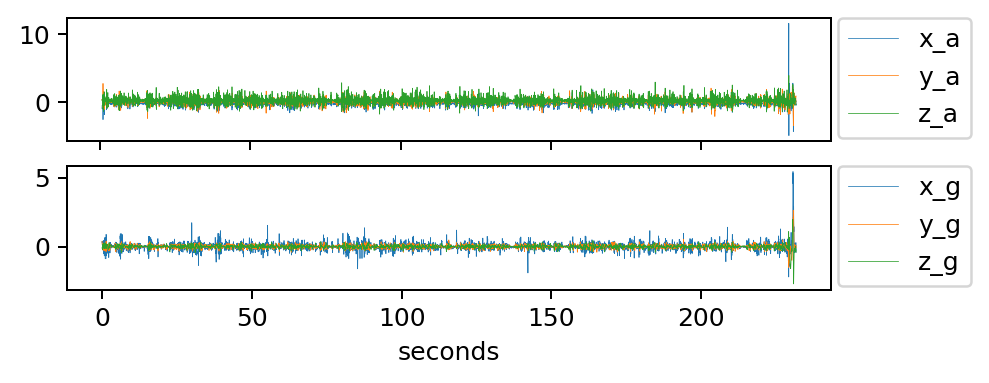

In [11]:
accel, gyro = data_exp1['accel'], data_exp1["gyro"]
accel.rename(columns={'x': 'x_a', 'y': 'y_a', 'z': 'z_a'}, inplace=True)
gyro.rename(columns={'x': 'x_g', 'y': 'y_g', 'z': 'z_g'}, inplace=True)
data = [accel, gyro]
plot_rows = [
    ["x_a", "y_a", "z_a"],
    ["x_g", "y_g", "z_g"],
]

min_date_0 = data[0]['time_stamp'].min()
min_date_1 = data[1]['time_stamp'].min()
base = min_date_0 if min_date_0 < min_date_1 else min_date_1 


data[0]['delta_time'] = data[0]['time_stamp'] - base
data[1]['delta_time'] = data[1]['time_stamp'] - base

get_seconds = lambda date_time: date_time.total_seconds()
data[0]['delta_time'] = data[0]['delta_time'].apply(get_seconds)
data[1]['delta_time'] = data[1]['delta_time'].apply(get_seconds)

data[0] = data[0].set_index('delta_time')
data[1] = data[1].set_index('delta_time')


# data[0] = data[0].set_index('time_stamp')
# data[1] = data[1].set_index('time_stamp')
f, axes = plt.subplots(2, 1, dpi=180, figsize=(5.473, 2))
for i, row in enumerate(plot_rows):
    print(i, row)
    g = data[i][row].plot(linewidth=0.3, ax=axes[i], sharex="col")
#     g = sns.lineplot(x="time_stamp", y=row, data=data[i], linewidth=0.3, ax=axes[i], sharex="col")
    g.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0)
    
g.axes.set_xlabel('seconds')

utility_functions imports setup complete
Python 3.9.10
EER: 0.333, Threshold: 0.600 <-- Arbitrary case
EER: 0.000, Threshold: 0.900 <-- Best case
EER: 1.000, Threshold: 0.900 <-- Worse case
EER: 0.400, Threshold: 0.200 <-- Worse case


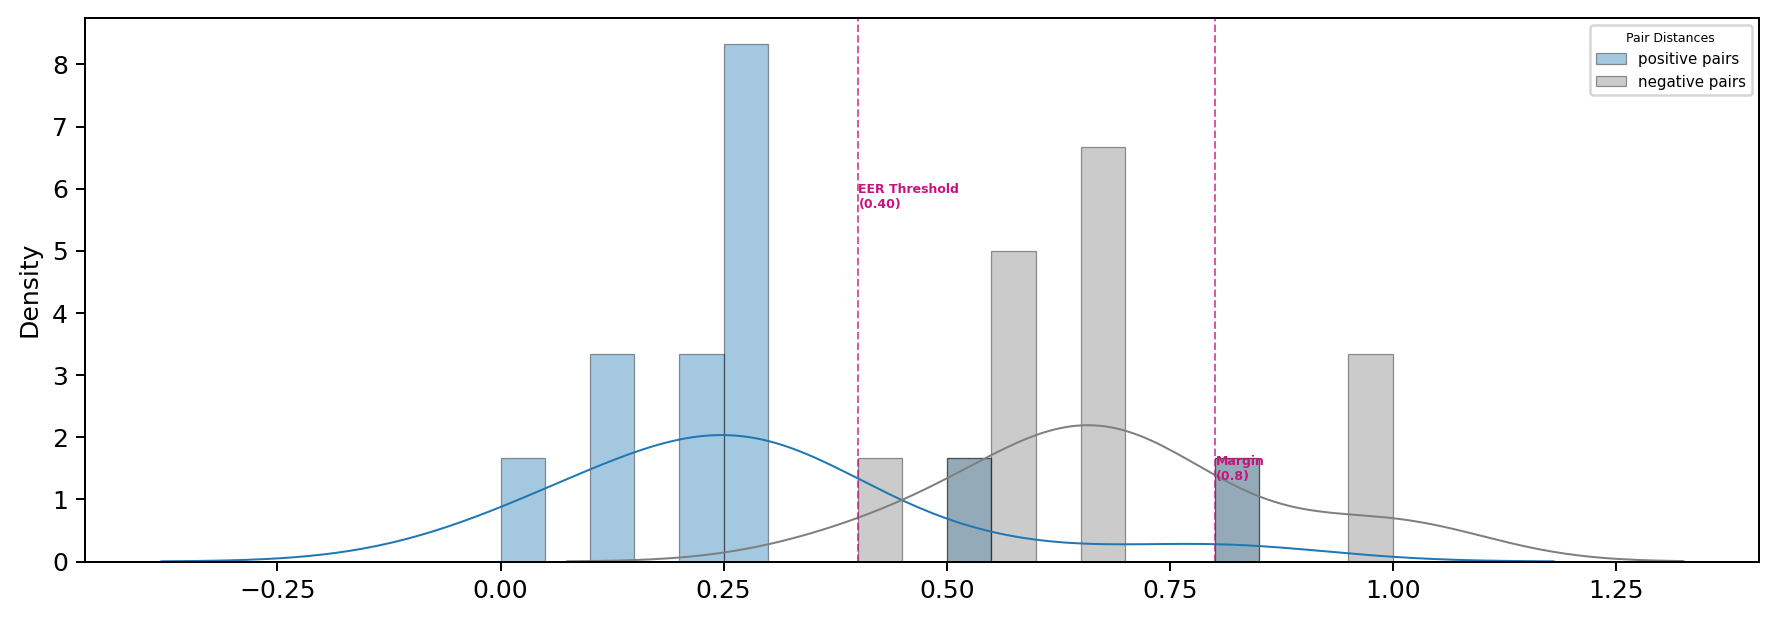

utility functions imported


In [52]:
%run ./utility-functions.ipynb

In [152]:
df_exps_dict = load_data_frames([1], 500, -500, 21000)
dfList_exp1, dfList_exp2 = df_exps_dict['dfList_exp1'], df_exps_dict['dfList_exp2']

Loading exp1 data:


/tmp/ipykernel_986747/1195744216.py:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(f'{os.getcwd()}/WACA_dataset/user{i}_1.csv', error_bad_lines = False, header=None, usecols = range(len(names)), dtype = str)


1) accel_count: 28388, gyro_count: 31997
Loading exp2 data:


/tmp/ipykernel_986747/1994135355.py:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(f'{os.getcwd()}/WACA_dataset/user{i}_2.csv', error_bad_lines = False, header=None, usecols = range(len(names)), dtype = str)


1) accel_count: 24049, gyro_count: 26943


In [153]:
raw_dfList_exp1 = dfList_exp1
raw_dfList_exp2 = dfList_exp2

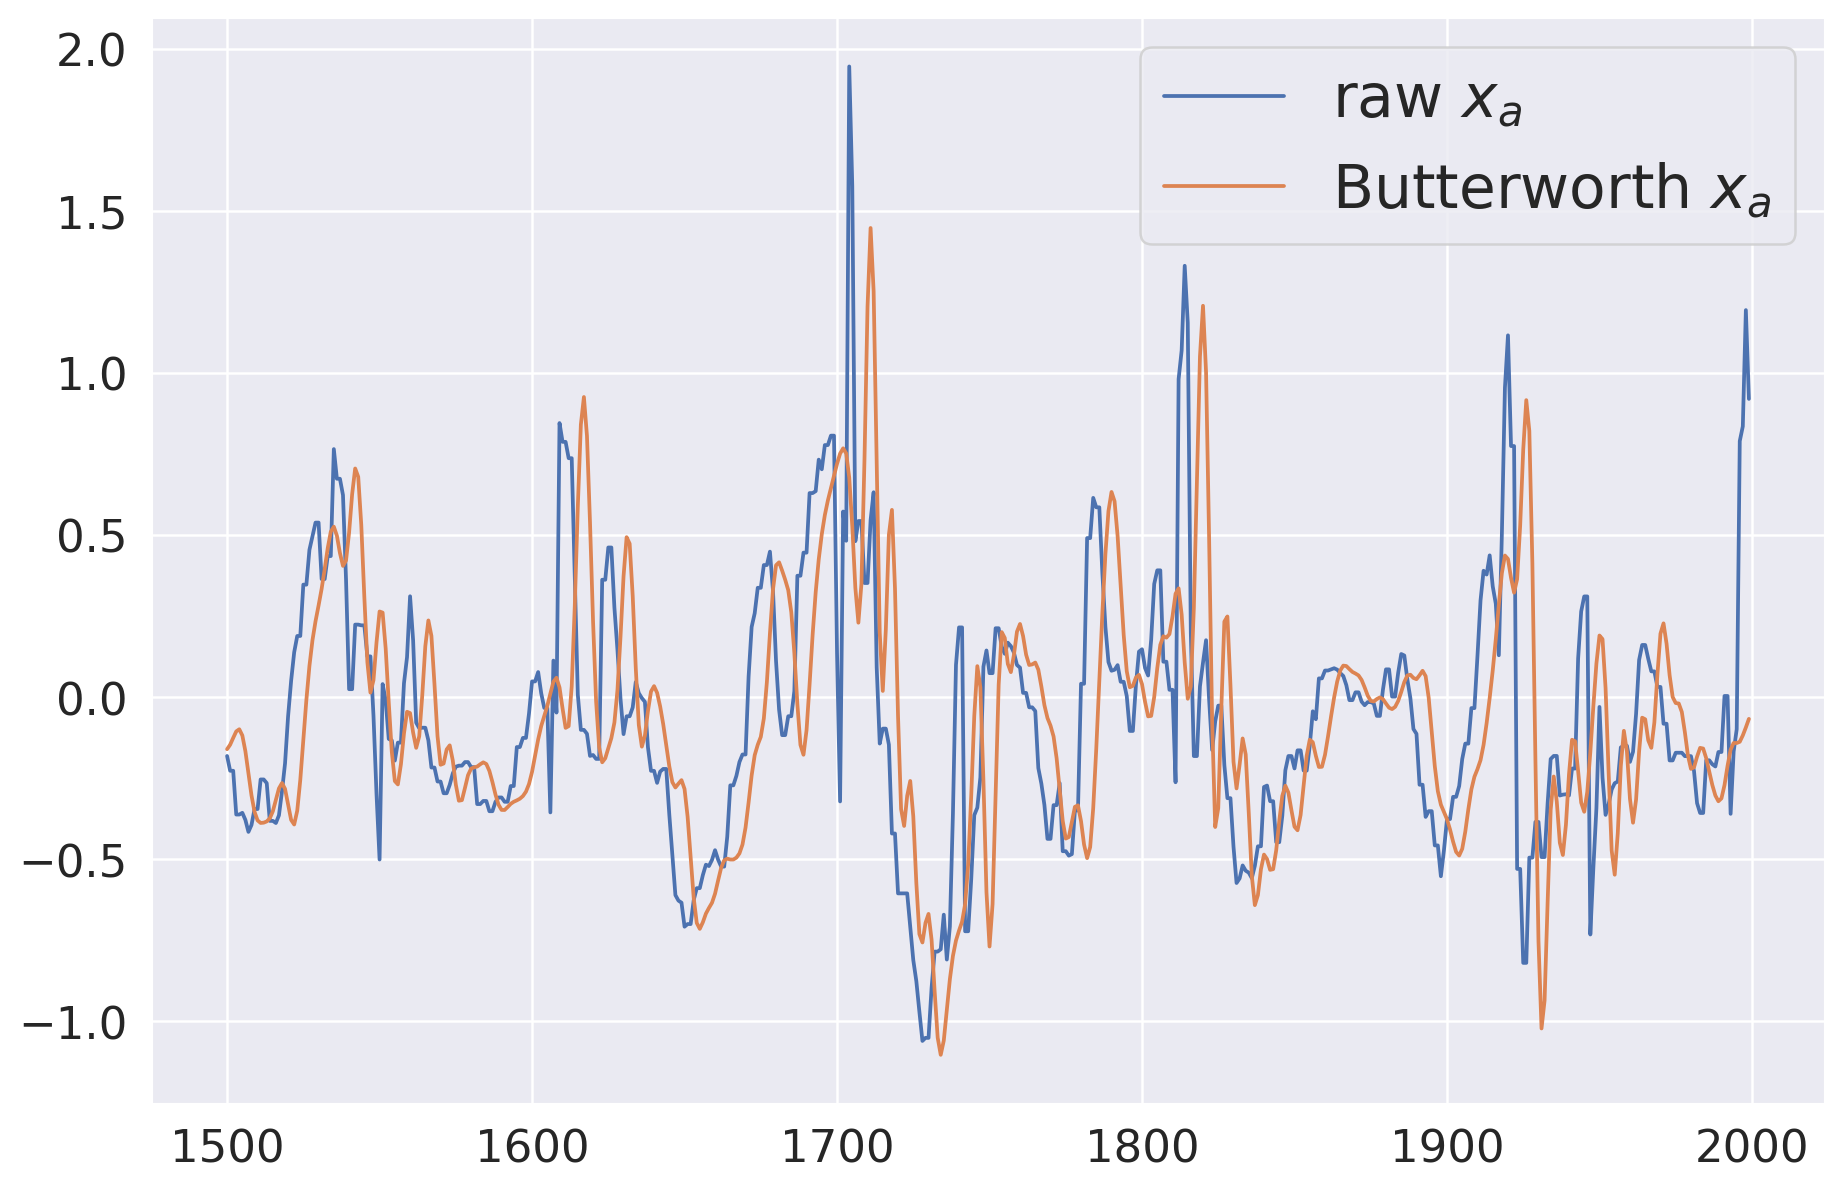

In [154]:
class P():
    
    def __init__(self):
        pass
    
sns.set(rc={'figure.figsize':(12,8), 'figure.dpi': 180, "legend.fontsize": 24, "xtick.labelsize": 18, "ytick.labelsize": 18})
i=0
P = P()
P.span=23
begin_idx = 1500
end_idx = 2000
# P.smoothing = "FFT+EMA"
# raw_dfList_exp1 = dfList_exp1
# raw_dfList_exp2 = dfList_exp2
P.cut_off_freq=17
raw_dfList_exp2[i][r'raw $x_a$'] = raw_dfList_exp2[i]['EMA_x_a']
# raw_dfList_exp1['Butterworth'] = get_ffted_dfList(raw_dfList_exp1, cut_off_freq=P.cut_off_freq, filter_order=10)
ffted_dfList_exp2 = get_ffted_dfList(raw_dfList_exp2, cut_off_freq=P.cut_off_freq, filter_order=10)
ffted_dfList_exp2[i][r'Butterworth $x_a$'] = ffted_dfList_exp2[i]['EMA_x_a']

# EMAed_dfList_exp1 = get_EMAed_dfList(ffted_dfList_exp1, span=P.span)
EMAed_dfList_exp2 = get_EMAed_dfList(raw_dfList_exp2, span=P.span)

raw_dfList_exp2[i][r'raw $x_a$'][begin_idx:end_idx].plot()
ffted_dfList_exp2[i][r'Butterworth $x_a$'][begin_idx:end_idx].plot()
# EMAed_dfList_exp2[i]['EMA_x_a'][begin_idx:end_idx].plot()
plt.legend( loc='upper right', borderaxespad=.5)
# fig = plt.get_figure()
plt.savefig("raw_x_a_vs_Butterworth_x_a.svg") 

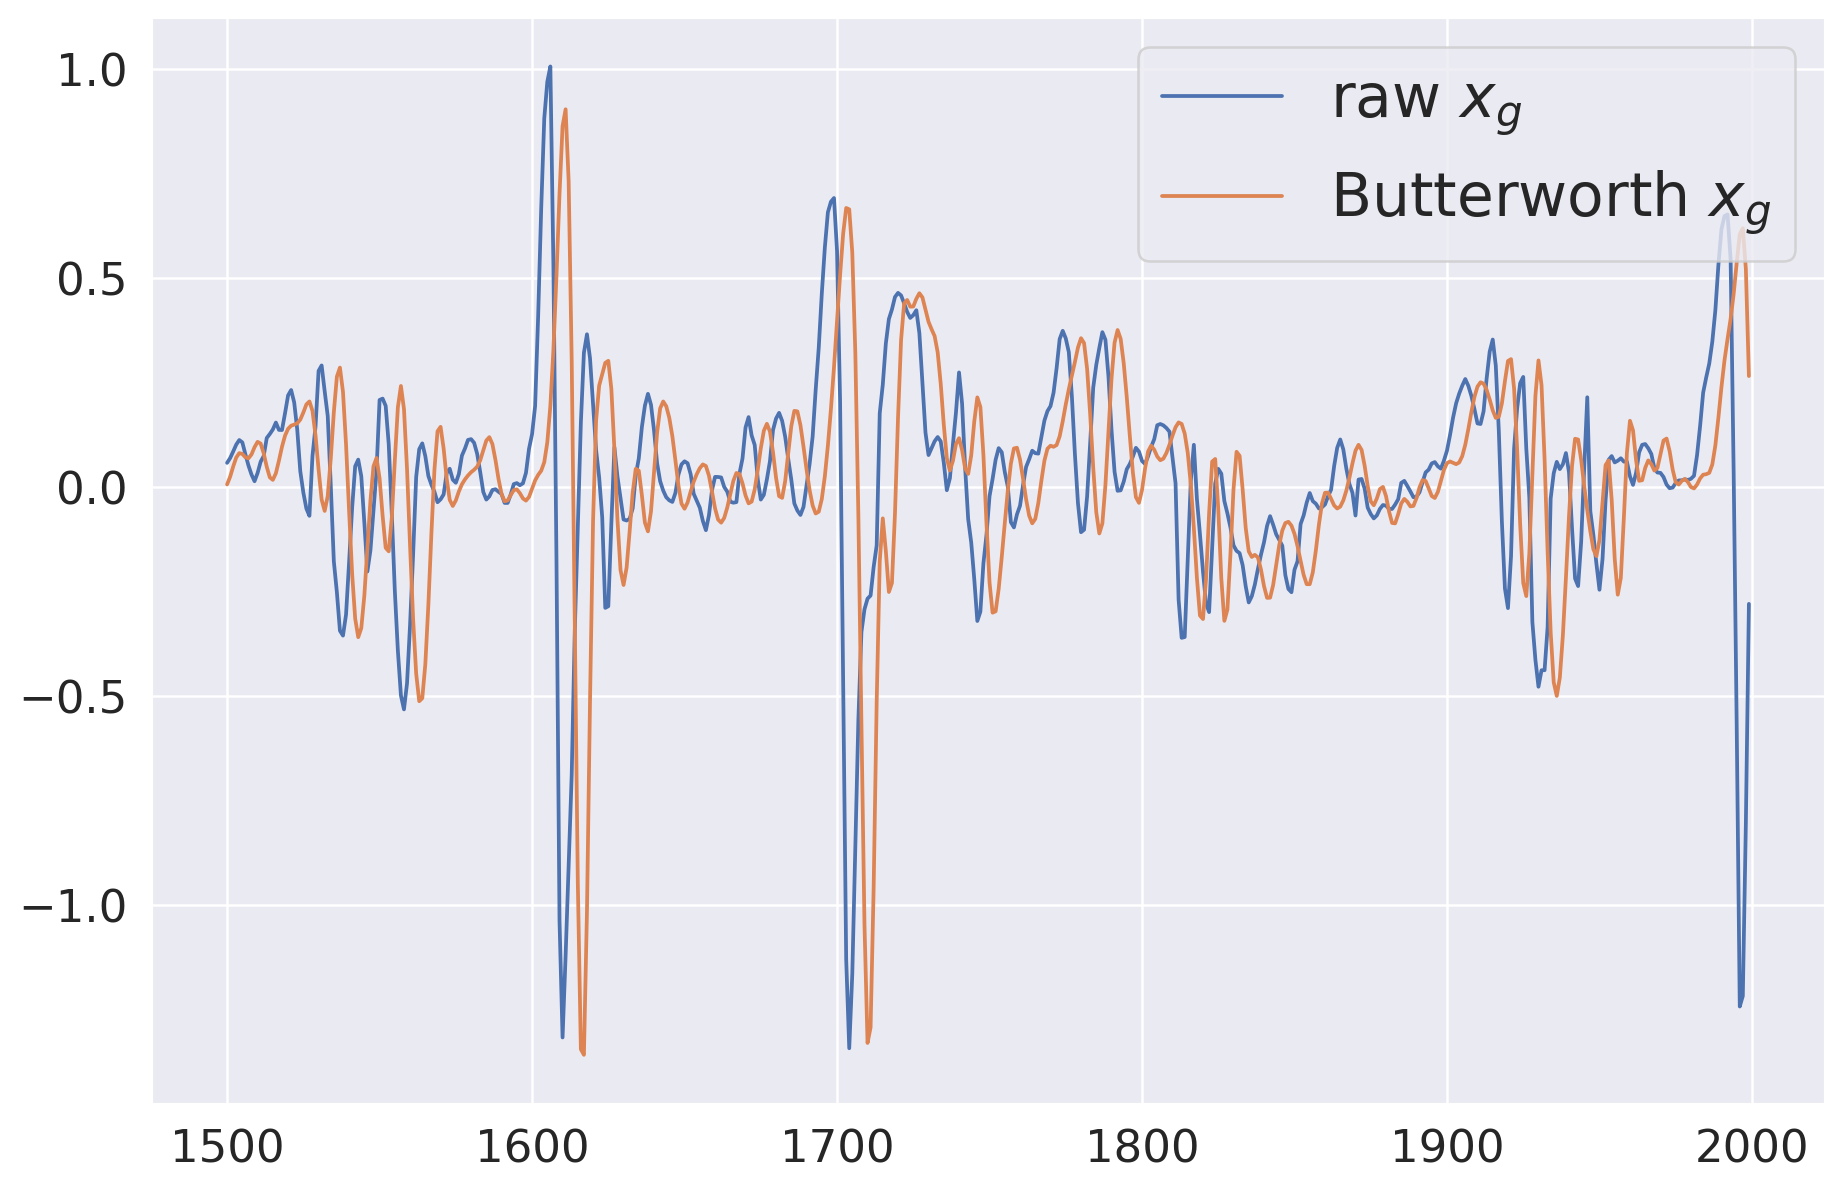

In [155]:
raw_dfList_exp2[i][r'raw $x_g$'] = raw_dfList_exp2[i]['EMA_x_g']
ffted_dfList_exp2[i][r'Butterworth $x_g$'] = get_ffted_dfList(raw_dfList_exp2, cut_off_freq=P.cut_off_freq, filter_order=10)[i]['EMA_x_g']

raw_dfList_exp2[i][r'raw $x_g$'][begin_idx:end_idx].plot()
ffted_dfList_exp2[i][r'Butterworth $x_g$'][begin_idx:end_idx].plot()
plt.legend( loc='upper right', borderaxespad=.5)
plt.savefig("raw_x_g_vs_Butterworth_x_g.svg") 

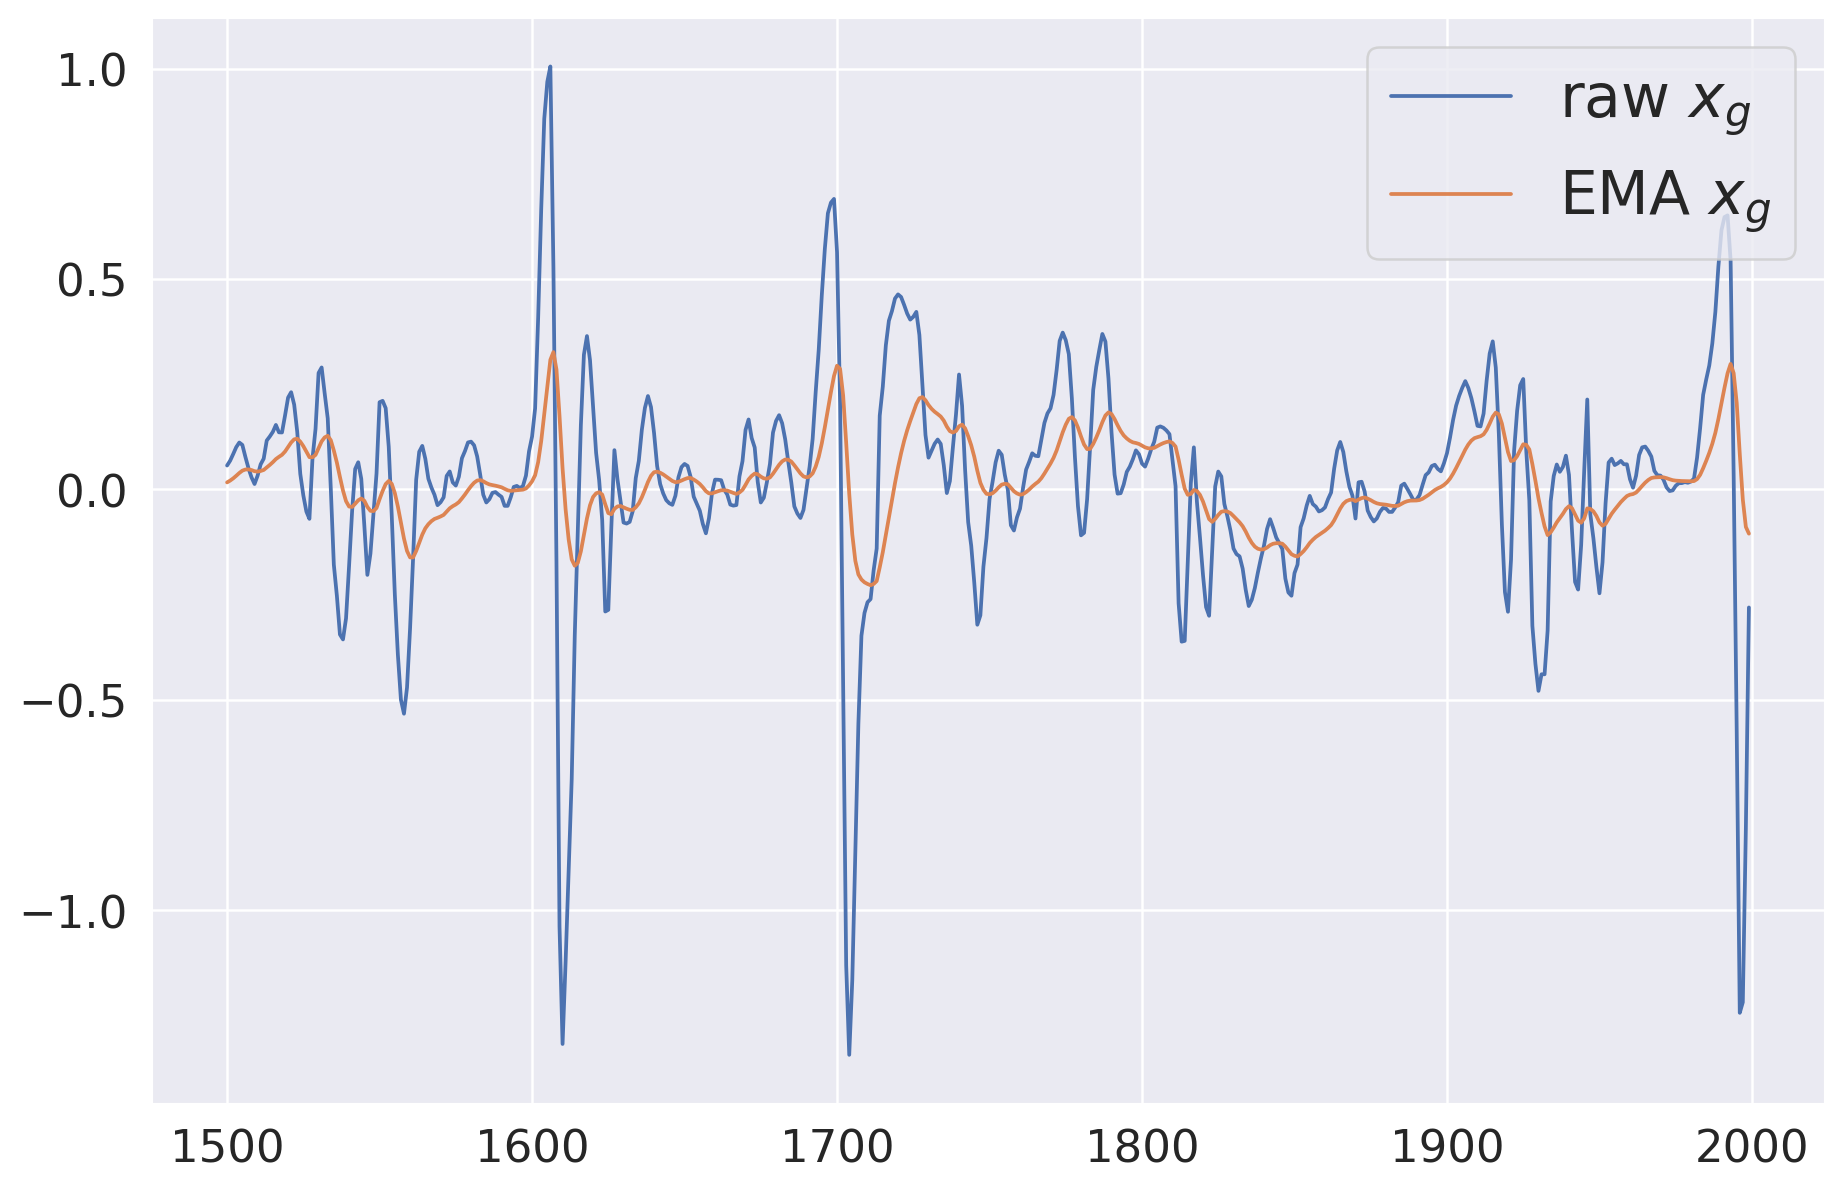

In [156]:
raw_dfList_exp2[i][r'raw $x_g$'] = raw_dfList_exp2[i]['EMA_x_g']
EMAed_dfList_exp2[i][r'EMA $x_g$'] = get_EMAed_dfList(raw_dfList_exp2, span=P.span)[i][r'EMA_x_g']



raw_dfList_exp2[i][r'raw $x_g$'][begin_idx:end_idx].plot()
EMAed_dfList_exp2[i][r'EMA $x_g$'][begin_idx:end_idx].plot()
plt.legend( loc='upper right', borderaxespad=.5)
plt.savefig("raw_x_g_vs_EMA_x_g.svg") 

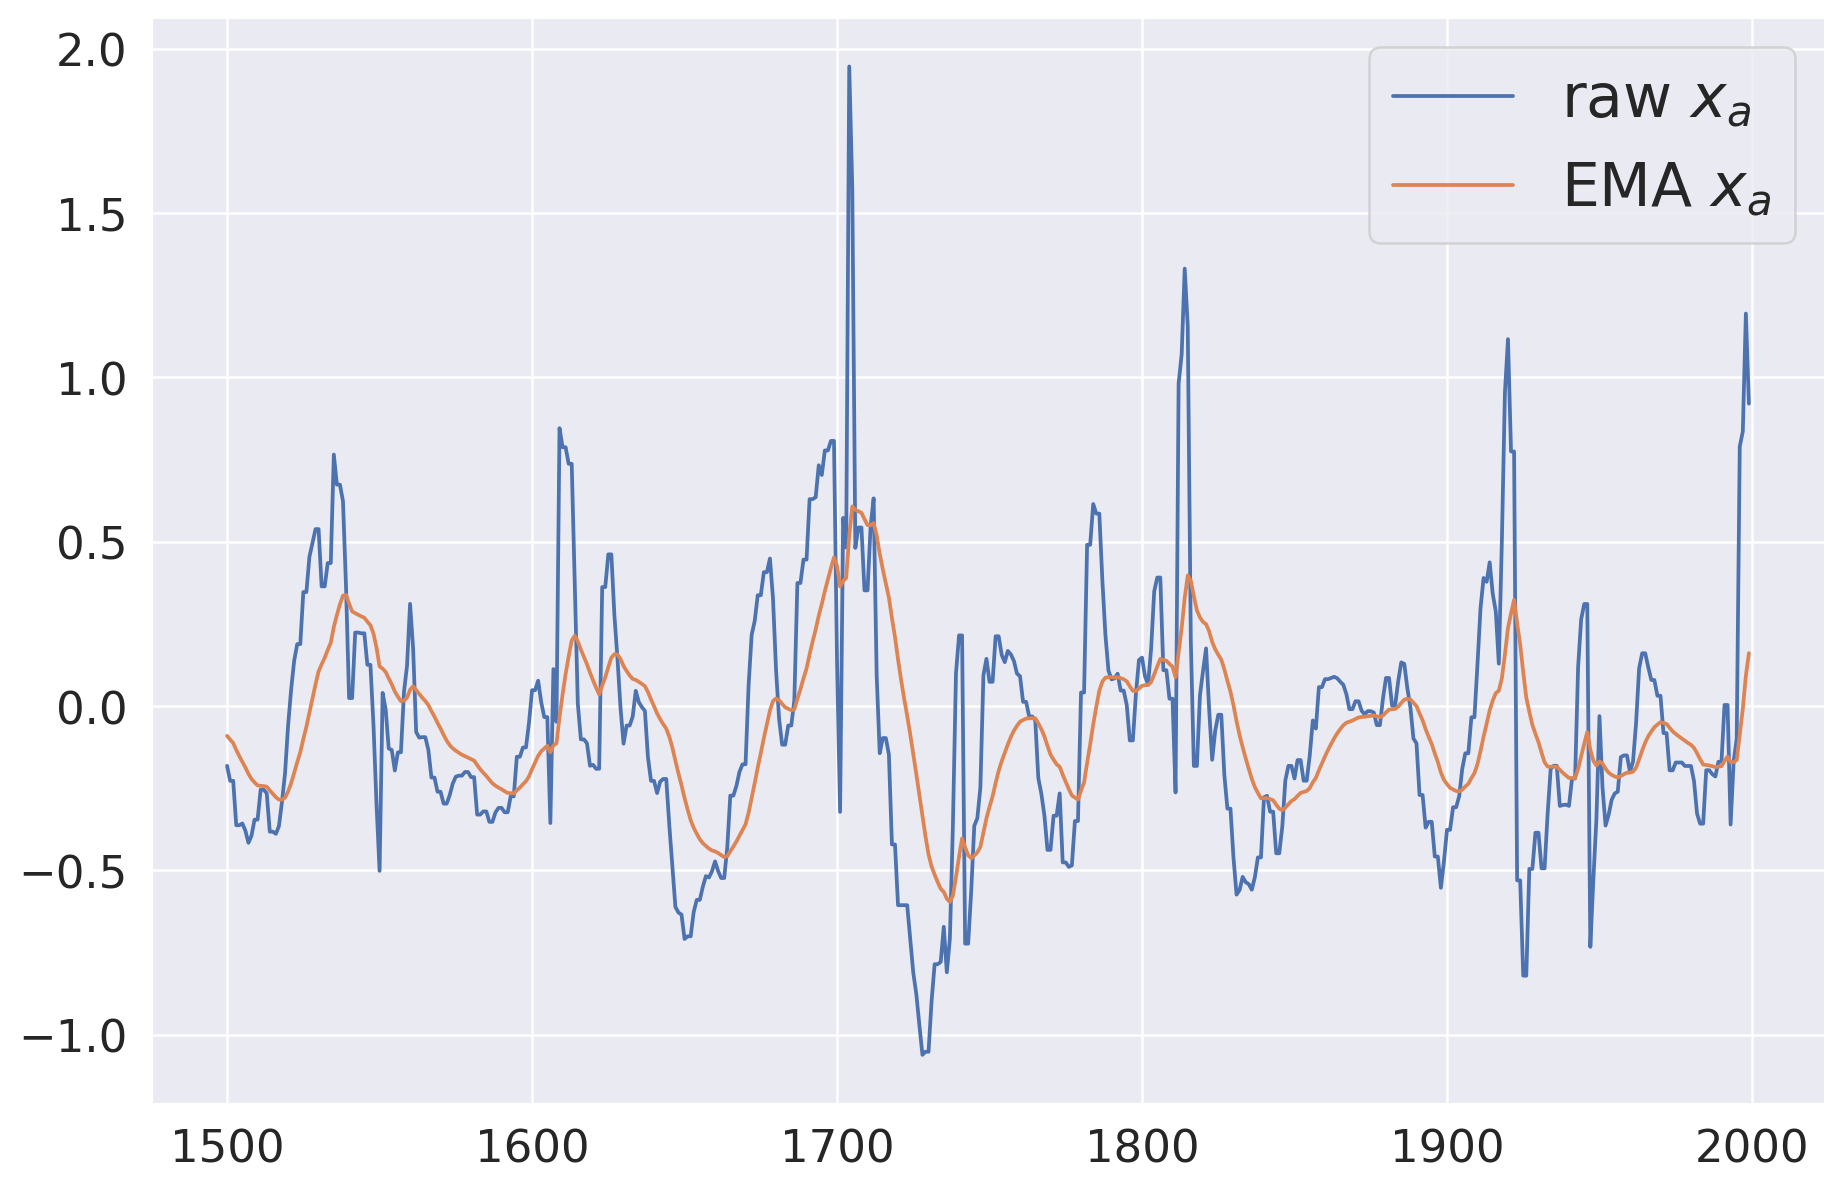

In [157]:
raw_dfList_exp2[i][r'raw $x_a$'] = raw_dfList_exp2[i]['EMA_x_a']
EMAed_dfList_exp2[i][r'EMA $x_a$'] = get_EMAed_dfList(raw_dfList_exp2, span=P.span)[i][r'EMA_x_a']



raw_dfList_exp2[i][r'raw $x_a$'][begin_idx:end_idx].plot()
EMAed_dfList_exp2[i][r'EMA $x_a$'][begin_idx:end_idx].plot()
plt.legend( loc='upper right', borderaxespad=.5)
plt.savefig("raw_x_a_vs_EMA_x_a.svg") 

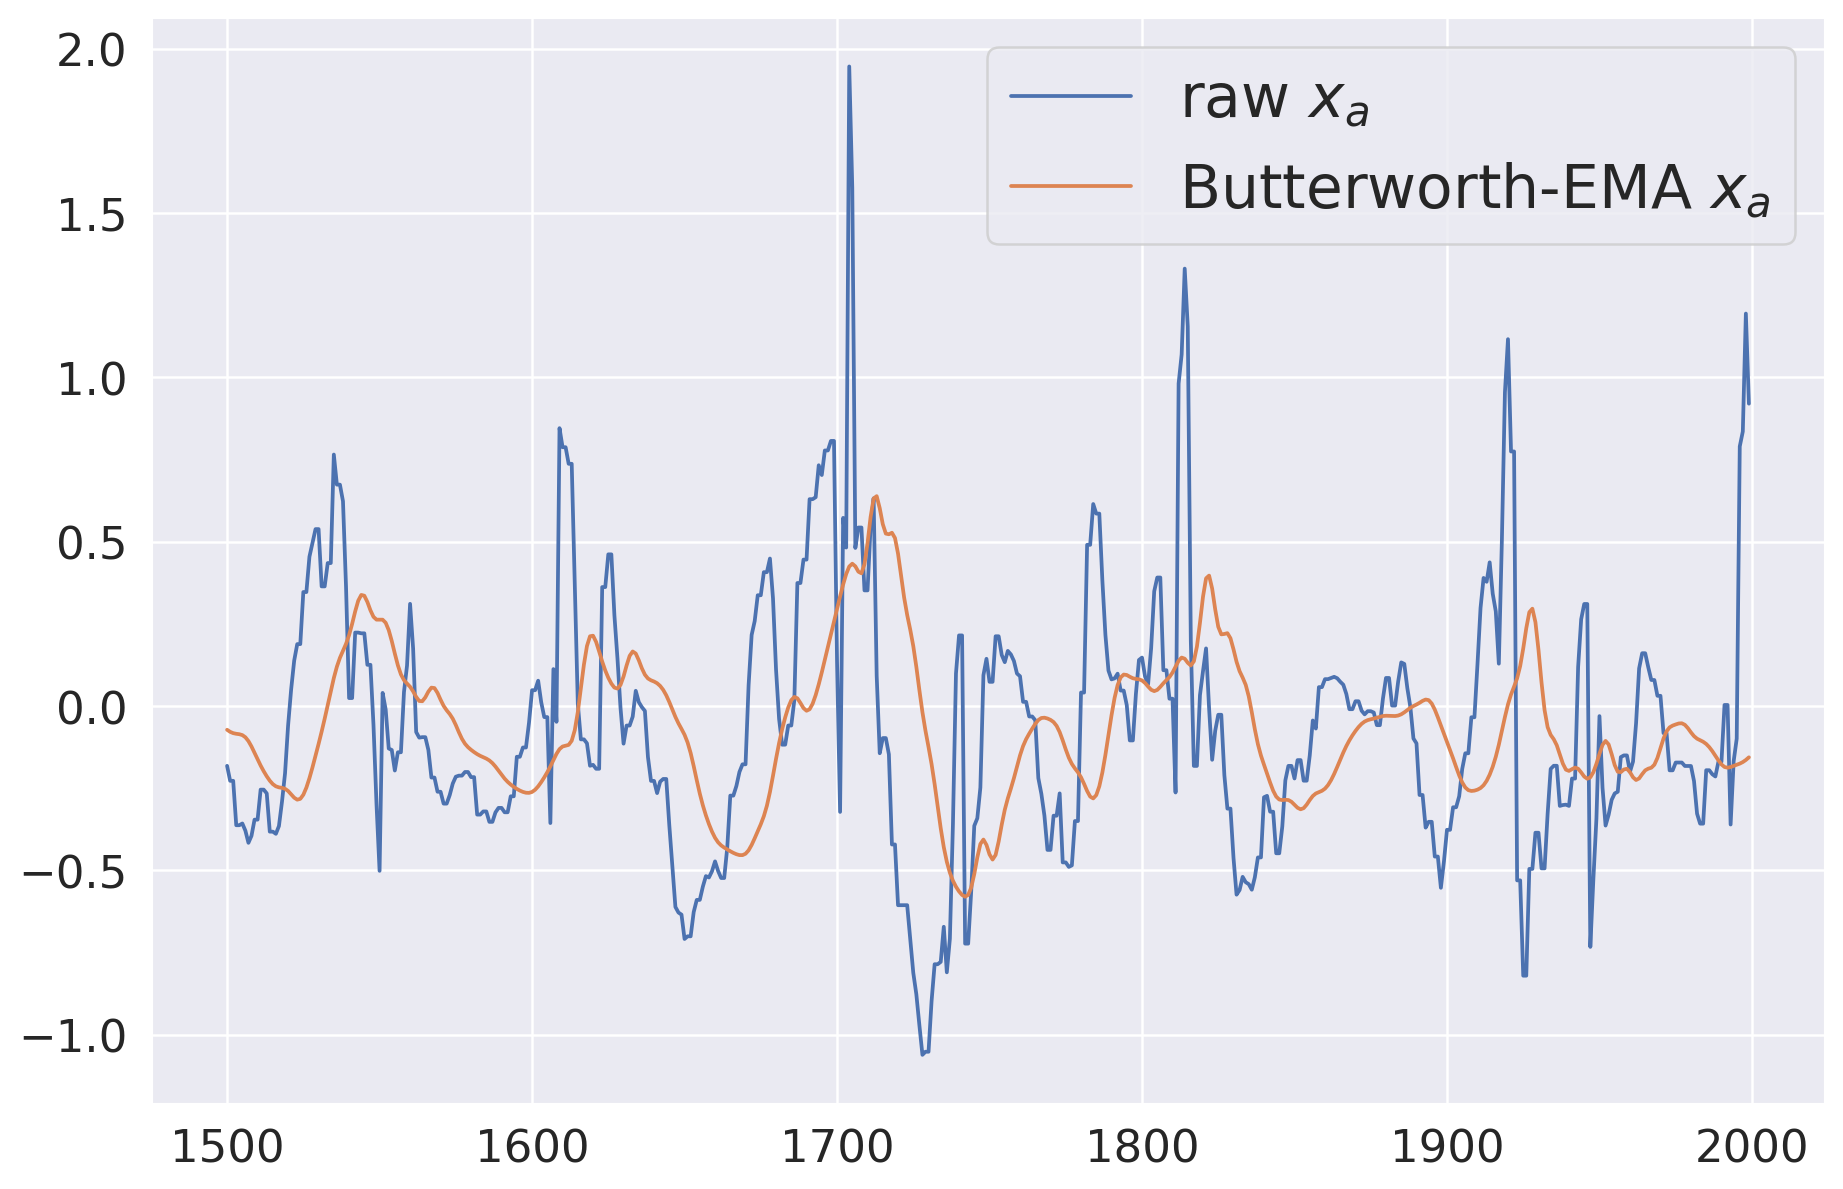

In [158]:
raw_dfList_exp2[i][r'raw $x_a$'] = raw_dfList_exp2[i]['EMA_x_a']
ffted_dfList_exp2[i][r'Butterworth $x_a$'] = get_ffted_dfList(raw_dfList_exp2, cut_off_freq=P.cut_off_freq, filter_order=10)[i]['EMA_x_a']
EMAed_dfList_exp2[i][r'Butterworth-EMA $x_a$'] = get_EMAed_dfList(ffted_dfList_exp2, span=P.span)[i]['EMA_x_a']



raw_dfList_exp2[i][r'raw $x_a$'][begin_idx:end_idx].plot()
EMAed_dfList_exp2[i][r'Butterworth-EMA $x_a$'][begin_idx:end_idx].plot()
plt.legend( loc='upper right', borderaxespad=.5)
plt.savefig("raw_x_a_vs_Butterworth-EMA_x_a.svg") 

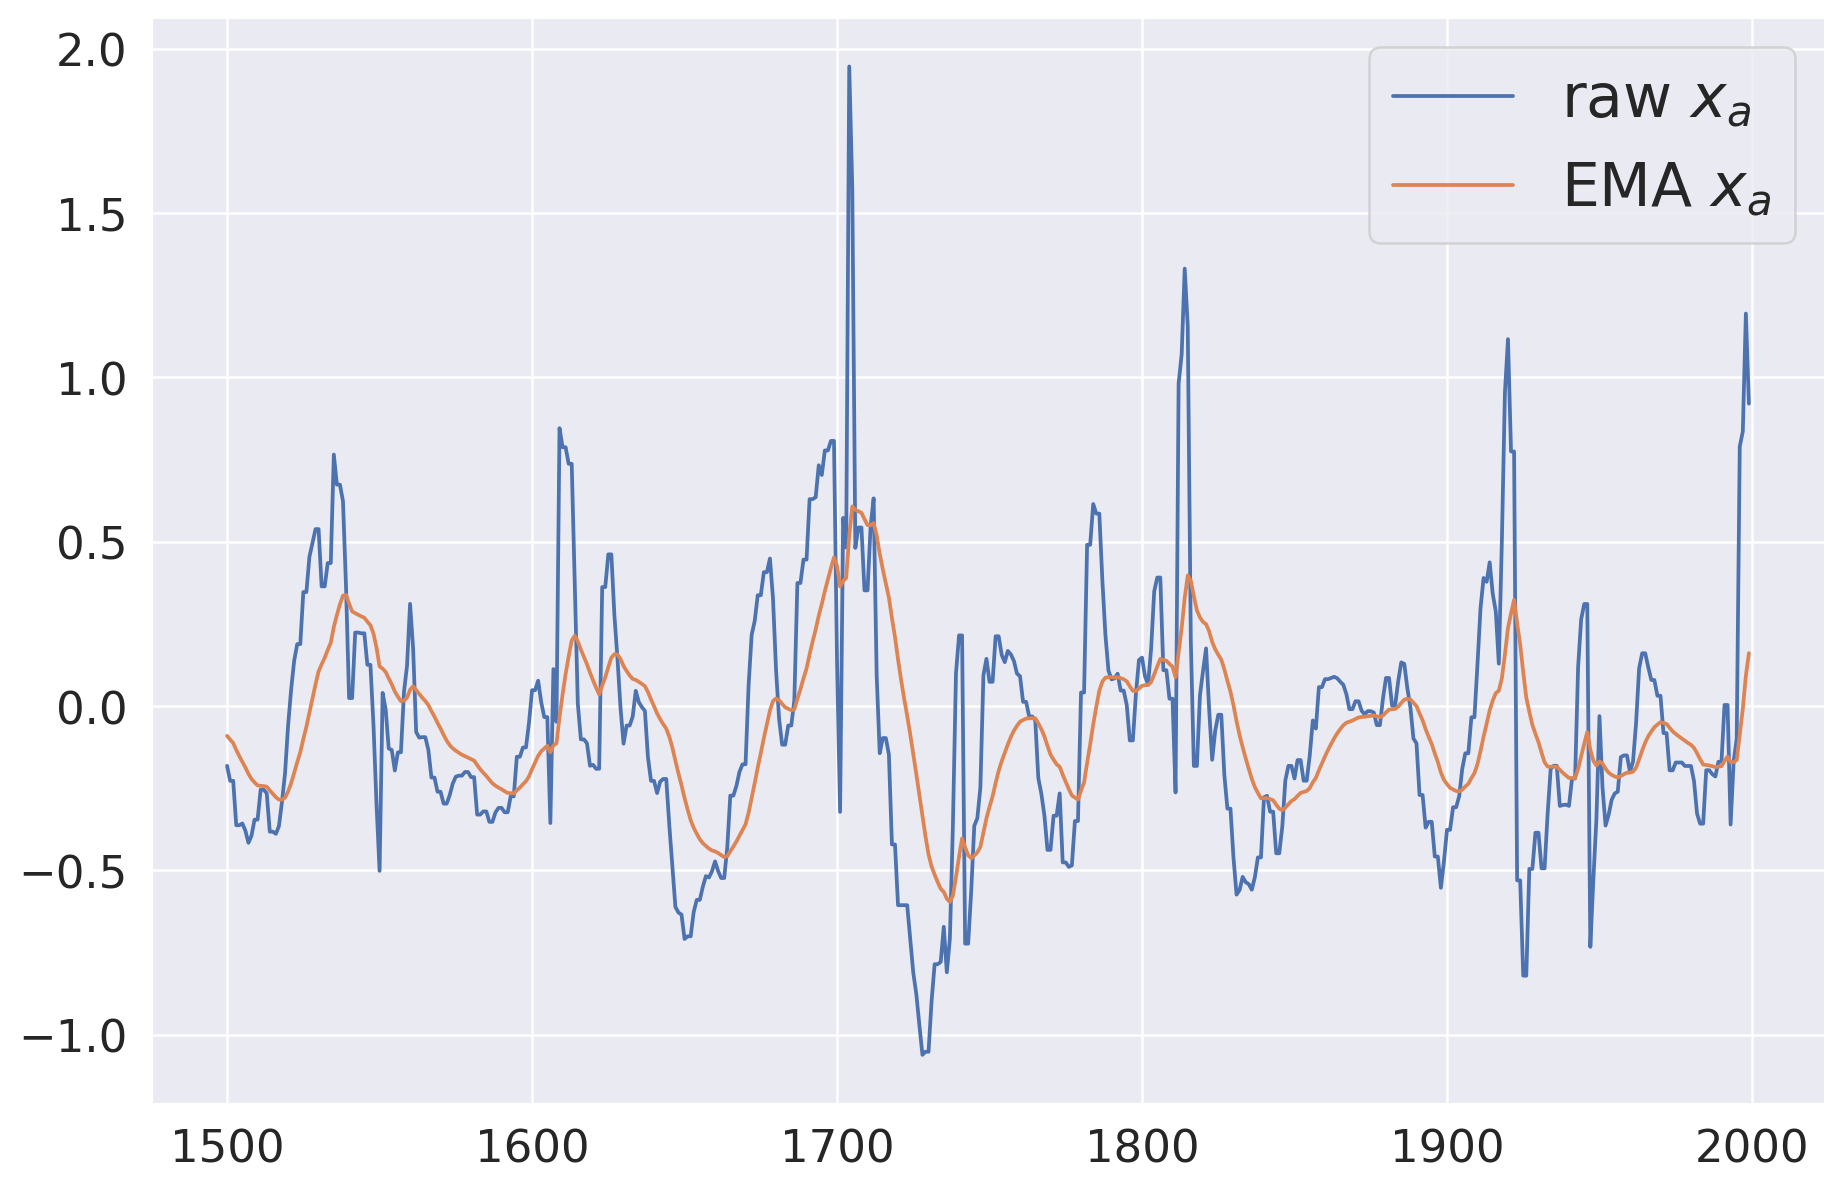

In [159]:
raw_dfList_exp2[i][r'raw $x_a$'] = raw_dfList_exp2[i]['EMA_x_a']
EMAed_dfList_exp2[i][r'EMA $x_a$'] = get_EMAed_dfList(raw_dfList_exp2, span=P.span)[i][r'EMA_x_a']



raw_dfList_exp2[i][r'raw $x_a$'][begin_idx:end_idx].plot()
EMAed_dfList_exp2[i][r'EMA $x_a$'][begin_idx:end_idx].plot()
plt.legend( loc='upper right', borderaxespad=.5)
plt.savefig("raw_x_a_vs_EMA_x_a.svg") 

In [95]:
mpl.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both',
          'axes.grid

In [12]:
data[0].head()

,sensor_id,system_time,x_a,y_a,z_a,time_stamp,EMA_x_a,EMA_y_a,EMA_z_a
delta_time,,,,,,,,,
0.632524,10,19116461084983,-0.944728,0.343551,0.264686,1970-01-01 05:18:36.461084983,-0.944728,0.343551,0.264686
0.712792,10,19116541353212,-0.514339,0.256428,0.369729,1970-01-01 05:18:36.541353212,-0.923733,0.339301,0.269810
0.725110,10,19116553670295,-0.539363,0.367807,0.239365,1970-01-01 05:18:36.553670295,-0.904984,0.340692,0.268325
0.733955,10,19116562516181,-0.572325,0.415837,0.185522,1970-01-01 05:18:36.562516181,-0.888756,0.344357,0.264285
0.745268,10,19116573828785,-0.568448,0.408148,0.186278,1970-01-01 05:18:36.573828785,-0.873132,0.347469,0.260480


# Sensor Data Distribution for User 18

0 x_a
0 0
1 x_g
0 1
0 y_a
1 0
1 y_g
1 1
0 z_a
2 0
1 z_g
2 1


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


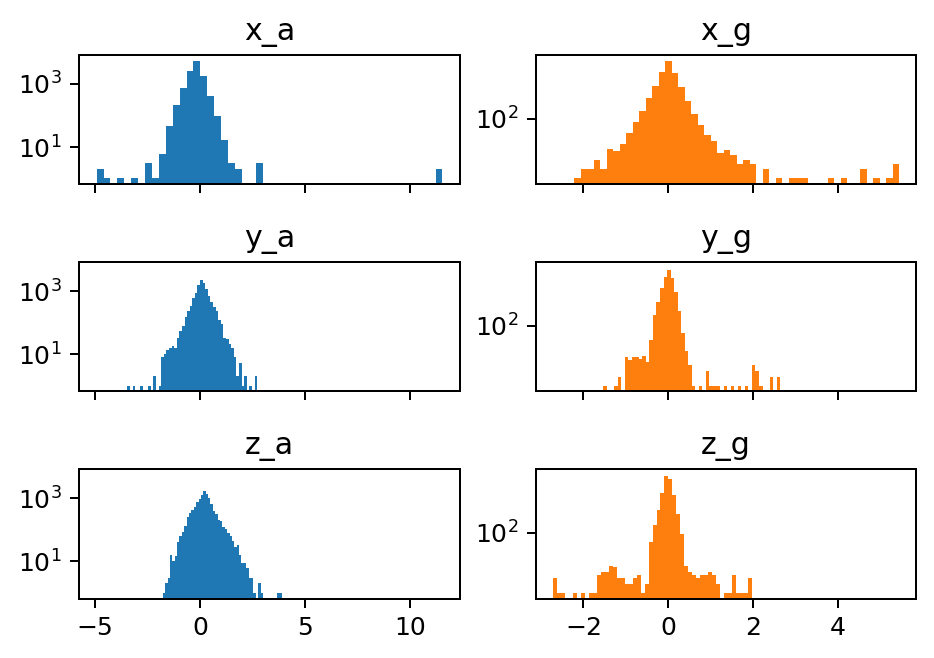

In [13]:
data = [accel, gyro]
plot_rows = [["x_a", "y_a", "z_a"],
            ["x_g", "y_g", "z_g"]]
plot_rows = np.array(plot_rows)
plot_cols = plot_rows.T

f, axes = plt.subplots(3, 2, sharex="col", sharey="col", dpi=180, figsize=(6, 4))
f.subplots_adjust(hspace=0.6, wspace=0.2)
cmap = cm.get_cmap("tab10")

for i, col in enumerate(plot_cols.ravel()):
    plot_column = i % 2
    plot_row = i // 2
    print(plot_column, col)
    print(plot_row, plot_column)
    g = sns.distplot(
        data[plot_column][col],
        kde=False,
        ax=axes[plot_row][plot_column],
        color=cmap(plot_column),
        hist_kws=dict(alpha=1),
    )
    g.set_title(f"{col}")
    g.set_yscale("log")
    g.axes.set_xlabel("")


In [14]:
def extractTextFromDocx(path):
    try:
        data = ""
        doc = docx.Document(path)  # Creating word reader object.
        fullText = []
        for para in doc.paragraphs:
            fullText.append(para.text)
            data = '\n'.join(fullText)

    except IOError:
        print(f'There was an error opening file: {path}')
        return
    except Exception:
        print(f"Could not find file: {path}")
    
    return data

def numberOfWords(text):
    return len(text.strip().split())

def numberOfChars(text):
    return len(text)

def wordsPerMinute(number_of_words, session_duration):
    wps = datetime.timedelta(seconds=number_of_words) / session_duration
    return wps * 60 

def charsPerMinute(number_of_chars, session_duration):
    return charsPerSecond(number_of_chars, session_duration) * 60

def charsPerSecond(number_of_chars, session_duration):
    return datetime.timedelta(seconds=number_of_chars) / session_duration

In [17]:
def delta_time_formatter(td):
    
    td_str = str(td).split()[-1]
    return td_str[td_str.index(':')+1:td_str.index('.')] + ':' + td_str[td_str.index('.')+1:td_str.index('.')+3]

In [18]:
import warnings
warnings.filterwarnings('ignore')


r = range(1, 50)

exp_user_words_typed_dict = {}
exp_user_chars_typed_dict = {}
exp_id = 1
for user_id in r:
    user_text_data = extractTextFromDocx(f'{os.getcwd()}/WACA_dataset/user{user_id}_{exp_id}.docx')
    
    if user_text_data is not None:
        exp_user_words_typed_dict[user_id] = numberOfWords(user_text_data)
        exp_user_chars_typed_dict[user_id] = numberOfChars(user_text_data)

exp_user_lst = []
for user_id in r:
    print(f"----------------------user_id: {user_id} --------------------")
    data_exp = getDataStats(user_id=user_id, exp_id=exp_id, print_accel_gyro_array_size=1, print_na_df_array_size=1, begin_idx=None, end_idx=None,
                                 eliminate_extreme_deviations=15, match_accel_gyro_data=False) 
    
    if data_exp is not None: 
        accel, gyro = data_exp['accel'], data_exp["gyro"]
        accel.rename(columns={'x': 'x_a', 'y': 'y_a', 'z': 'z_a'}, inplace=True)
        gyro.rename(columns={'x': 'x_g', 'y': 'y_g', 'z': 'z_g'}, inplace=True)

        words_per_minute = wordsPerMinute(exp_user_words_typed_dict[user_id], data_exp["session_duration"])
        chars_per_second = charsPerSecond(exp_user_chars_typed_dict[user_id], data_exp["session_duration"])
        
        exp_user_lst.append([user_id, accel['x_a'], accel['y_a'], accel["z_a"], gyro["x_g"], gyro["y_g"], gyro["z_g"], data_exp["session_duration"], 
                              data_exp["accel_duration"], data_exp["gyro_duration"], data_exp["session_frequency"], data_exp["accel_frequency"], 
                              data_exp["gyro_frequency"], data_exp["num_NaN"], data_exp["num_NaN_dropped"], words_per_minute, chars_per_second])

exp_user_arr = np.array(exp_user_lst)
columns = ['user_id', 'x_a', "y_a", "z_a", "x_g", "y_g", "z_g", "session_duration", "accel_duration", "gyro_duration", "session_frequency", 
           "accel_frequency", "gyro_frequency", "num_NaN", "num_NaN_dropped", "words_per_minute", "chars_per_second"]
exp_user_arr = np.array(exp_user_lst)
exp_user_df_exp_1 = pd.DataFrame(exp_user_arr, columns=columns)
exp_user_df_exp_1



----------------------user_id: 1 --------------------
Experiment: 1, User: 1, begin_idx: None, end_idx: None, df count: 61385, NaN_count: 0, NaN_dropped: 0, eliminate_extreme_deviations: 15, accel_count: 28809, gyro_count: 32576, session_duration: 0 days 00:05:04.178174468, session_frequency: 94.71093726690358, accel_frequency: 94.71093726690358, gyro_frequency: 107.09512625938599, accel_duration: 0 days 00:05:04.178174468, gyro_duration: 0 days 00:05:04.192403894
----------------------user_id: 2 --------------------
Experiment: 1, User: 2, begin_idx: None, end_idx: None, df count: 55969, NaN_count: 0, NaN_dropped: 0, eliminate_extreme_deviations: 15, accel_count: 26438, gyro_count: 29531, session_duration: 0 days 00:04:36.909449999, session_frequency: 95.47525373401116, accel_frequency: 95.47525373401116, gyro_frequency: 106.64497004384157, accel_duration: 0 days 00:04:36.909449999, gyro_duration: 0 days 00:04:36.909198332
----------------------user_id: 3 --------------------
Experime

,user_id,x_a,y_a,z_a,x_g,y_g,z_g,session_duration,accel_duration,gyro_duration,session_frequency,accel_frequency,gyro_frequency,num_NaN,num_NaN_dropped,words_per_minute,chars_per_second
0,1,12 -1.297232 10 -1.297232 2 -1...,12 -1.685075 10 -1.685075 2 -1...,12 0.404865 10 0.404865 2 0...,11 -0.116380 8 -0.116380 4 -0...,11 0.049002 8 0.049002 4 0...,11 0.068976 8 0.068976 4 0...,0 days 00:05:04.178174468,0 days 00:05:04.178174468,0 days 00:05:04.192403894,94.710937,94.710937,107.095126,0,0,35.111,3.238234
1,2,0 -4.105447 9 -2.554047 12 -2...,0 0.377995 9 0.288768 12 0...,0 0.015730 9 -0.235991 12 -0...,1 0.019175 2 0.006658 3 -0...,1 0.047404 2 0.034887 3 0...,1 0.005593 2 0.007723 3 0...,0 days 00:04:36.909449999,0 days 00:04:36.909449999,0 days 00:04:36.909198332,95.475254,95.475254,106.64497,0,0,26.001279,2.441231
2,3,1 2.659393 9 2.244143 12 2...,1 -0.094566 9 -0.104118 12 -0...,1 -0.173695 9 -0.288138 12 -0...,0 -0.426905 5 -0.426905 2 -0...,0 0.129430 5 0.129430 2 0...,0 1.007208 5 1.007208 2 1...,0 days 00:06:52.143391040,0 days 00:06:52.143391040,0 days 00:06:52.143391040,69.563168,69.563168,78.540626,0,0,18.925452,1.725128
3,4,0 4.047606 5 3.870652 14 3...,0 2.586633 5 2.246213 14 2...,0 -0.083139 5 0.269029 14 0...,2 -0.088151 3 -0.074036 10 -0...,2 0.060454 3 0.037018 10 0...,2 -0.105195 3 -0.099602 10 -0...,0 days 00:04:25.218689066,0 days 00:04:25.218689066,0 days 00:04:25.223680680,95.42691,95.42691,100.505738,0,0,44.793223,4.21916
4,5,3 0.033825 1 0.033825 12 -0...,3 0.040517 1 0.040517 12 0...,3 0.072104 1 0.072104 12 0...,2 0.025034 5 0.006658 7 0...,2 -0.014381 5 0.032491 7 0...,2 0.000533 5 0.006924 7 0...,0 days 00:04:12.193016153,0 days 00:04:12.193016153,0 days 00:04:12.182924695,97.857587,97.857587,98.884578,0,0,32.118257,3.180104
5,6,12 -3.352963 38 -2.687295 41 -2...,12 1.545530 38 0.116730 41 0...,12 0.203395 38 2.279127 41 2...,2 -0.033556 3 -0.053796 4 -0...,2 -0.089482 3 -0.067112 4 -0...,2 -0.003196 3 -0.004527 4 0...,0 days 00:04:21.658624588,0 days 00:04:21.658624588,0 days 00:04:21.713995734,97.107443,97.107443,98.078174,0,0,30.956365,3.049775
6,7,0 1.912036 2 1.912036 4 1...,0 5.194473 2 5.194473 4 5...,0 -1.433699 2 -1.433699 4 -1...,1 0.030626 11 0.030626 13 0...,1 0.006924 11 0.006924 13 0...,1 -0.027431 11 -0.027431 13 -0...,0 days 00:04:24.621668337,0 days 00:04:24.621668337,0 days 00:04:24.600298232,97.199145,97.199145,98.10988,0,0,52.376663,5.169645
7,8,1 -0.193940 12 -0.183035 18 -0...,1 -0.701336 12 -0.545979 18 -0...,1 0.362155 12 0.270478 18 0...,2 0.022637 4 0.023170 5 0...,2 0.036219 4 0.015180 5 0...,2 -0.042078 4 -0.037018 5 -0...,0 days 00:03:47.058416475,0 days 00:03:47.058416475,0 days 00:03:47.058687726,98.679452,98.679452,97.93515,4,0,81.124498,7.553122
8,9,3 0.878710 7 0.878710 10 0...,3 0.692970 7 0.692970 10 0...,3 0.136908 7 0.136908 10 0...,1 -0.016512 5 -0.016512 28 -0...,1 0.035420 5 0.035420 28 0...,1 -0.041013 5 -0.041013 28 -0...,0 days 00:04:02.760862980,0 days 00:04:02.760862980,0 days 00:04:02.760862980,39.734576,39.734576,96.597119,0,0,40.28656,3.711471
9,10,31 -0.685242 28 -0.829063 21 -0...,31 3.231349 28 2.924553 21 2...,31 -1.979894 28 -1.219360 21 -1...,29 -0.395746 30 -0.395746 19 -0...,29 -0.091080 30 -0.091080 19 -0...,29 -0.002131 30 -0.002131 19 -0...,0 days 00:04:59.958117178,0 days 00:04:59.958117178,0 days 00:04:59.958117178,36.595109,36.595109,68.012829,4,0,47.006563,4.20392


In [45]:
# exp_user_df_exp_1["session_duration"] = exp_user_df_exp_1["session_duration"].apply(delta_time_formatter)
# exp_user_df_exp_1["accel_duration"] = exp_user_df_exp_1["accel_duration"].apply(delta_time_formatter)
# exp_user_df_exp_1["gyro_duration"] = exp_user_df_exp_1["gyro_duration"].apply(delta_time_formatter)

columns_of_interest = ['user_id', "session_duration", "accel_duration", "gyro_duration",
           "accel_frequency", "gyro_frequency"]#"num_NaN", "words_per_minute", "chars_per_second"]
exp_user_df_exp_1[columns_of_interest]

,user_id,session_duration,accel_duration,gyro_duration,accel_frequency,gyro_frequency
0,1,05:04:17,05:04:17,05:04:19,94.710937,107.095126
1,2,04:36:90,04:36:90,04:36:90,95.475254,106.64497
2,3,06:52:14,06:52:14,06:52:14,69.563168,78.540626
3,4,04:25:21,04:25:21,04:25:22,95.42691,100.505738
4,5,04:12:19,04:12:19,04:12:18,97.857587,98.884578
5,6,04:21:65,04:21:65,04:21:71,97.107443,98.078174
6,7,04:24:62,04:24:62,04:24:60,97.199145,98.10988
7,8,03:47:05,03:47:05,03:47:05,98.679452,97.93515
8,9,04:02:76,04:02:76,04:02:76,39.734576,96.597119
9,10,04:59:95,04:59:95,04:59:95,36.595109,68.012829


In [43]:
print(exp_user_df_exp_1[columns_of_interest].set_index('user_id').to_latex(float_format="{:0.2f}".format, longtable=True))

\begin{longtable}{lllllllll}
\toprule
{} & session\_duration & accel\_duration & gyro\_duration & accel\_frequency & gyro\_frequency & num\_NaN & words\_per\_minute & chars\_per\_second \\
user\_id &                  &                &               &                 &                &         &                  &                  \\
\midrule
\endfirsthead

\toprule
{} & session\_duration & accel\_duration & gyro\_duration & accel\_frequency & gyro\_frequency & num\_NaN & words\_per\_minute & chars\_per\_second \\
user\_id &                  &                &               &                 &                &         &                  &                  \\
\midrule
\endhead
\midrule
\multicolumn{9}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
1       &         05:04:17 &       05:04:17 &      05:04:19 &           94.71 &         107.10 &       0 &            35.11 &             3.24 \\
2       &         04:36:90 &       04:36:90 &      04:36:90 &       

In [21]:
import warnings
warnings.filterwarnings('ignore')


r = range(1, 50)

exp_user_words_typed_dict = {}
exp_user_chars_typed_dict = {}
exp_id = 2
for user_id in r:
    user_text_data = extractTextFromDocx(f'{os.getcwd()}/WACA_dataset/user{user_id}_{exp_id}.docx')
    
    if user_text_data is not None:
        exp_user_words_typed_dict[user_id] = numberOfWords(user_text_data)
        exp_user_chars_typed_dict[user_id] = numberOfChars(user_text_data)

exp_user_lst = []
for user_id in r:
    print(f"----------------------user_id: {user_id} --------------------")
    data_exp = getDataStats(user_id=user_id, exp_id=exp_id, print_accel_gyro_array_size=1, print_na_df_array_size=1, begin_idx=None, end_idx=None,
                                 eliminate_extreme_deviations=15, match_accel_gyro_data=False) 
    exp_id
    if data_exp is not None: 
        accel, gyro = data_exp['accel'], data_exp["gyro"]
        accel.rename(columns={'x': 'x_a', 'y': 'y_a', 'z': 'z_a'}, inplace=True)
        gyro.rename(columns={'x': 'x_g', 'y': 'y_g', 'z': 'z_g'}, inplace=True)

        words_per_minute = wordsPerMinute(exp_user_words_typed_dict[user_id], data_exp["session_duration"])
        chars_per_second = charsPerSecond(exp_user_chars_typed_dict[user_id], data_exp["session_duration"])
        
        exp_user_lst.append([user_id, accel['x_a'], accel['y_a'], accel["z_a"], gyro["x_g"], gyro["y_g"], gyro["z_g"], data_exp["session_duration"], 
                              data_exp["accel_duration"], data_exp["gyro_duration"], data_exp["session_frequency"], data_exp["accel_frequency"], 
                              data_exp["gyro_frequency"], data_exp["num_NaN"], data_exp["num_NaN_dropped"], words_per_minute, chars_per_second])

exp_user_arr = np.array(exp_user_lst)
columns = ['user_id', 'x_a', "y_a", "z_a", "x_g", "y_g", "z_g", "session_duration", "accel_duration", "gyro_duration", "session_frequency", 
           "accel_frequency", "gyro_frequency", "num_NaN", "num_NaN_dropped", "words_per_minute", "chars_per_second"]
exp_user_arr = np.array(exp_user_lst)
exp_user_df_exp_2 = pd.DataFrame(exp_user_arr, columns=columns)
exp_user_df_exp_2


----------------------user_id: 1 --------------------
Experiment: 2, User: 1, begin_idx: None, end_idx: None, df count: 51992, NaN_count: 0, NaN_dropped: 0, eliminate_extreme_deviations: 15, accel_count: 24459, gyro_count: 27533, session_duration: 0 days 00:04:17.445776100, session_frequency: 95.00641405163066, accel_frequency: 95.00641405163066, gyro_frequency: 106.94679251333035, accel_duration: 0 days 00:04:17.445776100, gyro_duration: 0 days 00:04:17.421669693
----------------------user_id: 2 --------------------
Experiment: 2, User: 2, begin_idx: None, end_idx: None, df count: 53140, NaN_count: 0, NaN_dropped: 0, eliminate_extreme_deviations: 15, accel_count: 24893, gyro_count: 28245, session_duration: 0 days 00:04:23.546945785, session_frequency: 94.45376012935304, accel_frequency: 94.45376012935304, gyro_frequency: 107.17255673697733, accel_duration: 0 days 00:04:23.546945785, gyro_duration: 0 days 00:04:23.537542504
----------------------user_id: 3 --------------------
Experime

,user_id,x_a,y_a,z_a,x_g,y_g,z_g,session_duration,accel_duration,gyro_duration,session_frequency,accel_frequency,gyro_frequency,num_NaN,num_NaN_dropped,words_per_minute,chars_per_second
0,1,0 -0.743448 2 -1.184552 9 -1...,0 0.254375 2 0.125722 9 -0...,0 0.230942 2 -0.126084 9 0...,1 -0.055127 3 -0.055127 8 -0...,1 0.069509 3 0.069509 8 0...,1 -0.270311 3 -0.270311 8 -0...,0 days 00:04:17.445776100,0 days 00:04:17.445776100,0 days 00:04:17.421669693,95.006414,95.006414,106.946793,0,0,32.62823,3.266707
1,2,0 1.622023 3 1.301121 9 1...,0 -0.756741 3 -0.592579 9 -0...,0 0.014309 3 0.336308 9 0...,1 -0.017311 7 0.005326 8 0...,1 0.005593 7 0.002929 8 0...,1 0.014647 7 -0.006924 8 -0...,0 days 00:04:23.546945785,0 days 00:04:23.546945785,0 days 00:04:23.537542504,94.45376,94.45376,107.172557,0,0,23.904659,2.409438
2,3,11 2.159328 0 2.615101 1 2...,11 2.693497 0 3.160808 1 3...,11 -0.025682 0 0.128158 1 0...,14 -0.060986 2 -0.040214 3 -0...,14 -0.061519 2 -0.048203 3 -0...,14 0.058323 2 0.111054 3 0...,0 days 00:04:13.957375528,0 days 00:04:13.957375528,0 days 00:04:13.933636414,98.58741,98.58741,108.577276,16,0,27.169914,2.681552
3,4,21 0.582885 13 0.582885 5 0...,21 1.655139 13 1.655139 5 1...,21 0.494188 13 0.494188 5 -0...,0 -0.135821 2 -0.135821 3 -0...,0 -0.246076 2 -0.246076 3 -0...,0 -0.108923 2 -0.108923 3 -0...,0 days 00:04:28.055776773,0 days 00:04:28.055776773,0 days 00:04:28.049313179,94.76386,94.76386,102.098154,0,0,38.723284,3.872328
4,5,3 -1.031132 5 -1.031132 16 -1...,3 3.526766 5 3.526766 16 3...,3 -0.006335 5 -0.006335 16 -0...,1 0.026898 15 0.026898 14 0...,1 0.001864 15 0.001864 14 0...,1 0.024501 15 0.024501 14 0...,0 days 00:04:03.632528813,0 days 00:04:03.632528813,0 days 00:04:03.621450116,98.418713,98.418713,98.369459,0,0,31.769157,3.172811
5,6,12 -0.413794 15 -0.603791 18 -0...,12 0.878243 15 0.919540 18 0...,12 -0.025290 15 -0.163049 18 -0...,0 -0.017843 3 0.008788 5 0...,0 0.086286 3 0.086553 5 0...,0 0.062584 3 0.039947 5 0...,0 days 00:04:07.754493499,0 days 00:04:07.754493499,0 days 00:04:07.843050374,97.871081,97.871081,98.654114,4,0,35.115408,3.471178
6,7,0 2.932195 7 3.731703 10 4...,0 1.465881 7 1.434233 10 1...,0 -1.354980 7 -1.521724 10 -2...,2 -0.610130 8 -0.371777 11 -0...,2 0.402936 8 0.340352 11 0...,2 -0.204531 8 0.264452 11 -0...,0 days 00:04:03.361697251,0 days 00:04:03.361697251,0 days 00:04:03.339817042,97.784492,97.784492,101.474473,0,0,54.240253,5.337734
7,8,0 1.329475 10 1.324701 15 1...,0 2.901902 10 2.807283 15 2...,0 1.276503 10 1.280856 15 1...,6 0.019974 13 0.017311 26 0...,6 -0.042078 13 -0.035420 26 -0...,6 0.002397 13 0.000000 26 -0...,0 days 00:03:57.555355065,0 days 00:03:57.555355065,0 days 00:03:57.533498920,98.334975,98.334975,97.930859,0,0,75.519241,7.358285
8,10,3 0.854053 7 0.854053 23 0...,3 0.405333 7 0.405333 23 0...,3 -0.256464 7 -0.256464 23 -0...,1 0.042611 5 0.042611 25 0...,1 -0.054861 5 -0.054861 25 -0...,1 -0.026632 5 -0.026632 25 -0...,0 days 00:04:07.054773291,0 days 00:04:07.054773291,0 days 00:04:07.063709228,47.936738,47.936738,84.734246,0,0,52.458003,5.152704
9,11,8 -1.356252 9 -1.356252 2 -1...,8 0.800674 9 0.800674 2 0...,8 -0.872012 9 -0.872012 2 -0...,1 0.140503 6 0.009125 3 0...,1 -0.054398 6 -0.321426 3 -0...,1 0.170013 6 0.259735 3 0...,0 days 00:04:17.716819753,0 days 00:04:17.716819753,0 days 00:04:17.718406667,186.798052,186.798052,9.70833,0,0,34.456424,3.336996


In [22]:
exp_user_df_exp_2[columns_of_interest]

,user_id,session_duration,accel_duration,gyro_duration,accel_frequency,gyro_frequency,num_NaN,words_per_minute,chars_per_second
0,1,0 days 00:04:17.445776100,0 days 00:04:17.445776100,0 days 00:04:17.421669693,95.006414,106.946793,0,32.62823,3.266707
1,2,0 days 00:04:23.546945785,0 days 00:04:23.546945785,0 days 00:04:23.537542504,94.45376,107.172557,0,23.904659,2.409438
2,3,0 days 00:04:13.957375528,0 days 00:04:13.957375528,0 days 00:04:13.933636414,98.58741,108.577276,16,27.169914,2.681552
3,4,0 days 00:04:28.055776773,0 days 00:04:28.055776773,0 days 00:04:28.049313179,94.76386,102.098154,0,38.723284,3.872328
4,5,0 days 00:04:03.632528813,0 days 00:04:03.632528813,0 days 00:04:03.621450116,98.418713,98.369459,0,31.769157,3.172811
5,6,0 days 00:04:07.754493499,0 days 00:04:07.754493499,0 days 00:04:07.843050374,97.871081,98.654114,4,35.115408,3.471178
6,7,0 days 00:04:03.361697251,0 days 00:04:03.361697251,0 days 00:04:03.339817042,97.784492,101.474473,0,54.240253,5.337734
7,8,0 days 00:03:57.555355065,0 days 00:03:57.555355065,0 days 00:03:57.533498920,98.334975,97.930859,0,75.519241,7.358285
8,10,0 days 00:04:07.054773291,0 days 00:04:07.054773291,0 days 00:04:07.063709228,47.936738,84.734246,0,52.458003,5.152704
9,11,0 days 00:04:17.716819753,0 days 00:04:17.716819753,0 days 00:04:17.718406667,186.798052,9.70833,0,34.456424,3.336996


In [23]:
exp_user_df_exp_2 = exp_user_df_exp_2[columns_of_interest]

In [24]:
exp_user_df_exp_2["session_duration"] = exp_user_df_exp_2[columns_of_interest]["session_duration"].apply(delta_time_formatter)
exp_user_df_exp_2["accel_duration"] = exp_user_df_exp_2[columns_of_interest]["accel_duration"].apply(delta_time_formatter)
exp_user_df_exp_2["gyro_duration"] = exp_user_df_exp_2[columns_of_interest]["gyro_duration"].apply(delta_time_formatter)

In [25]:
exp_user_df_exp_2

,user_id,session_duration,accel_duration,gyro_duration,accel_frequency,gyro_frequency,num_NaN,words_per_minute,chars_per_second
0,1,04:17:44,04:17:44,04:17:42,95.006414,106.946793,0,32.62823,3.266707
1,2,04:23:54,04:23:54,04:23:53,94.45376,107.172557,0,23.904659,2.409438
2,3,04:13:95,04:13:95,04:13:93,98.58741,108.577276,16,27.169914,2.681552
3,4,04:28:05,04:28:05,04:28:04,94.76386,102.098154,0,38.723284,3.872328
4,5,04:03:63,04:03:63,04:03:62,98.418713,98.369459,0,31.769157,3.172811
5,6,04:07:75,04:07:75,04:07:84,97.871081,98.654114,4,35.115408,3.471178
6,7,04:03:36,04:03:36,04:03:33,97.784492,101.474473,0,54.240253,5.337734
7,8,03:57:55,03:57:55,03:57:53,98.334975,97.930859,0,75.519241,7.358285
8,10,04:07:05,04:07:05,04:07:06,47.936738,84.734246,0,52.458003,5.152704
9,11,04:17:71,04:17:71,04:17:71,186.798052,9.70833,0,34.456424,3.336996


In [26]:
# print(dt_str)
# print(delta_time_formatter(dt_str))
# exp_user_df_exp_2[columns_of_interest]["session_duration"]

In [42]:
print(exp_user_df_exp_2[columns_of_interest].set_index('user_id').to_latex(float_format="{:0.2f}".format, longtable=True))

\begin{longtable}{lllllllll}
\toprule
{} & session\_duration & accel\_duration & gyro\_duration & accel\_frequency & gyro\_frequency & num\_NaN & words\_per\_minute & chars\_per\_second \\
user\_id &                  &                &               &                 &                &         &                  &                  \\
\midrule
\endfirsthead

\toprule
{} & session\_duration & accel\_duration & gyro\_duration & accel\_frequency & gyro\_frequency & num\_NaN & words\_per\_minute & chars\_per\_second \\
user\_id &                  &                &               &                 &                &         &                  &                  \\
\midrule
\endhead
\midrule
\multicolumn{9}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
1       &         04:17:44 &       04:17:44 &      04:17:42 &           95.01 &         106.95 &       0 &            32.63 &             3.27 \\
2       &         04:23:54 &       04:23:54 &      04:23:53 &       

In [28]:
dfList_exp1[i][['EMA_x_a']].plot(figsize=(30, 6))
dfList_exp1[i][['EMA_y_a']].plot(figsize=(30, 6))
dfList_exp1[i][['EMA_z_a']].plot(figsize=(30, 6))
dfList_exp1[i][['EMA_x_g']].plot(figsize=(30, 6))
dfList_exp1[i][['EMA_y_g']].plot(figsize=(30, 6))
dfList_exp1[i][['EMA_z_g']].plot(figsize=(30, 6))

dfList_exp2[i][['EMA_x_a']].plot(figsize=(30, 6))
dfList_exp2[i][['EMA_y_a']].plot(figsize=(30, 6))
dfList_exp2[i][['EMA_z_a']].plot(figsize=(30, 6))
dfList_exp2[i][['EMA_x_g']].plot(figsize=(30, 6))
dfList_exp2[i][['EMA_y_g']].plot(figsize=(30, 6))
dfList_exp2[i][['EMA_z_g']].plot(figsize=(30, 6))

NameError: name 'dfList_exp1' is not defined

In [ ]:
exp1_user_df.iloc[0]['x_a']

In [ ]:
exp1_user_df.dtypes

In [ ]:
feature_cols = ["words_per_minute", "chars_per_second", "session_frequency"]
df = exp1_user_df[feature_cols]
types_dict = {'words_per_minute': 'float64', 'chars_per_second': 'float64', 'session_frequency': 'float64'}
for col, col_type in types_dict.items():
    df[col] = df[col].astype(col_type)

corr = df[feature_cols].corr()

In [ ]:
sns.heatmap(corr)


In [ ]:
exp1_user_df["chars_per_second"].plot()

In [ ]:
exp1_user_df["chars_per_second"].hist()

In [ ]:
exp1_user_df["words_per_minute"].plot()

In [ ]:
exp1_user_df["words_per_minute"].hist()

In [ ]:
(exp1_user_df["session_duration"] / np.timedelta64(1, 'm')).hist()

In [ ]:
session_duration_minutes =  exp1_user_df["session_duration"] / np.timedelta64(1, 'm')
max_y = len(exp1_user_df)/2
text_dist_from_mean_line = 0.1
new_line_dist = 2
MAGENTA=(1,0,1,1)

print(f"Histogramm of session duration, for all {len(exp1_user_df)} exp1 sessions in minutes")
mean_duration = session_duration_minutes.mean()
fig = plt.figure(dpi=180, figsize=(5.473, 2))
g = sns.distplot(
    session_duration_minutes, kde=False, hist_kws=dict(alpha=1, lw=0.5)
)
g.set_xlabel("Session Duration in Minutes", fontsize=6)
plt.plot(
    [mean_duration, mean_duration], [0, max_y], linestyle="dashed", color=MAGENTA, lw=0.8
)
plt.text(
    mean_duration + text_dist_from_mean_line,
    max_y - new_line_dist,
    "mean",
    fontsize=6,
    color=MAGENTA,
    horizontalalignment="left",
)
plt.text(
    mean_duration + text_dist_from_mean_line,
    max_y - 2 * new_line_dist,
    f"({mean_duration:.1f} min)",
    fontsize=5,
    color=MAGENTA,
    horizontalalignment="left",
)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

# Feature Selection

Correlation Matrix

In [ ]:
def spectral_energy(x):
    '''
    spectral_energy according to Parseval's theorem
    '''
    return (1/len(x)) * np.sum(np.abs(np.fft.rfft(x))**2)

In [ ]:
def signal_to_encoding(signal_df):
    dic = {}
    
#     print("mean calculation started")
    dic['mean_x_a'] = np.mean(signal_df['x_a'])
    dic['mean_y_a'] = np.mean(signal_df['y_a'])
    dic['mean_z_a'] = np.mean(signal_df['z_a'])
    dic['mean_x_g'] = np.mean(signal_df['x_g'])
    dic['mean_y_g'] = np.mean(signal_df['y_g'])
    dic['mean_z_g'] = np.mean(signal_df['z_g'])
#     print("mean calculation ended")
    
#     print("median calculation started")
    dic['median_x_a'] = np.median(signal_df['x_a'])
    dic['median_y_a'] = np.median(signal_df['y_a'])
    dic['median_z_a'] = np.median(signal_df['z_a'])
    dic['median_x_g'] = np.median(signal_df['x_g'])
    dic['median_y_g'] = np.median(signal_df['y_g'])
    dic['median_z_g'] = np.median(signal_df['z_g'])
#     print("median calculation ended")
    
#     print("var calculation started")
    dic['var_x_a'] = np.var(signal_df['x_a'])
    dic['var_y_a'] = np.var(signal_df['y_a'])
    dic['var_z_a'] = np.var(signal_df['z_a'])
    dic['var_x_g'] = np.var(signal_df['x_g'])
    dic['var_y_g'] = np.var(signal_df['y_g'])
    dic['var_z_g'] = np.var(signal_df['z_g'])
#     print("var calculation ended")
    
#     print("avg absolute difference of peaks calculation started")
    peaks_x_a, _ = find_peaks(signal_df['x_a'])
    peaks_y_a, _ = find_peaks(signal_df['y_a'])
    peaks_z_a, _ = find_peaks(signal_df['z_a'])
    peaks_x_g, _ = find_peaks(signal_df['x_g'])
    peaks_y_g, _ = find_peaks(signal_df['y_g'])
    peaks_z_g, _ = find_peaks(signal_df['z_g'])
    
#     print(type(peak_widths(peaks_x_a, signal_df['EMA_x_a'], rel_height=0.5)[0]))
    dic['aadp_x_a'] = np.mean(peak_widths(signal_df['x_a'], peaks_x_a, rel_height=0.5)[0])
    dic['aadp_y_a'] = np.mean(peak_widths(signal_df['y_a'], peaks_y_a, rel_height=0.5)[0])
    dic['aadp_z_a'] = np.mean(peak_widths(signal_df['z_a'], peaks_z_a, rel_height=0.5)[0])
    dic['aadp_x_g'] = np.mean(peak_widths(signal_df['x_g'], peaks_x_g, rel_height=0.5)[0])
    dic['aadp_y_g'] = np.mean(peak_widths(signal_df['y_g'], peaks_y_g, rel_height=0.5)[0])
    dic['aadp_z_g'] = np.mean(peak_widths(signal_df['z_g'], peaks_z_g, rel_height=0.5)[0])
#     print("avg absolute difference of peaks calculation ended")
    
#     print("range calculation started")
    dic['ptp_x_a'] = np.ptp(signal_df['x_a'])
    dic['ptp_y_a'] = np.ptp(signal_df['y_a'])
    dic['ptp_z_a'] = np.ptp(signal_df['z_a'])
    dic['ptp_x_g'] = np.ptp(signal_df['x_g'])
    dic['ptp_y_g'] = np.ptp(signal_df['y_g'])
    dic['ptp_z_g'] = np.ptp(signal_df['z_g'])
#     print("range calculation ended")
    
#     print("mode calculation started")
    dic['mode_x_a'] = mode(signal_df['x_a'])[0][0]
    dic['mode_y_a'] = mode(signal_df['y_a'])[0][0]
    dic['mode_z_a'] = mode(signal_df['z_a'])[0][0]
    dic['mode_x_g'] = mode(signal_df['x_g'])[0][0]
    dic['mode_y_g'] = mode(signal_df['y_g'])[0][0]
    dic['mode_z_g'] = mode(signal_df['z_g'])[0][0]
#     print("mode calculation ended")
    
#     print("cov calculation started")
    dic['cov_x_a'] = np.cov(signal_df['x_a']) * 1
    dic['cov_y_a'] = np.cov(signal_df['y_a']) * 1
    dic['cov_z_a'] = np.cov(signal_df['z_a']) * 1
    dic['cov_x_g'] = np.cov(signal_df['x_g']) * 1
    dic['cov_y_g'] = np.cov(signal_df['y_g']) * 1
    dic['cov_z_g'] = np.cov(signal_df['z_g']) * 1
#     print("cov calculation ended")
    
#     print("mean absolute deviation calculation started")
    dic['mad_x_a'] = median_absolute_deviation(signal_df['x_a'])
    dic['mad_y_a'] = median_absolute_deviation(signal_df['y_a'])
    dic['mad_z_a'] = median_absolute_deviation(signal_df['z_a'])
    dic['mad_x_g'] = median_absolute_deviation(signal_df['x_g'])
    dic['mad_y_g'] = median_absolute_deviation(signal_df['y_g'])
    dic['mad_z_g'] = median_absolute_deviation(signal_df['z_g'])
#     print("mean absolute deviation calculation ended")
    
#     print("inter-quartile range calculation started")
    dic['iqr_x_a'] = iqr(signal_df['x_a'])
    dic['iqr_y_a'] = iqr(signal_df['y_a'])
    dic['iqr_z_a'] = iqr(signal_df['z_a'])
    dic['iqr_x_g'] = iqr(signal_df['x_g'])
    dic['iqr_y_g'] = iqr(signal_df['y_g'])
    dic['iqr_z_g'] = iqr(signal_df['z_g'])
#     print("inter-quartile range calculation ended")
    
#     print("correlation calculation started")
    dic['correlate_xy_a'] = np.correlate(signal_df['x_a'], signal_df['y_a'])[0]
    dic['correlate_yz_a'] = np.correlate(signal_df['y_a'], signal_df['z_a'])[0]
    dic['correlate_xz_a'] = np.correlate(signal_df['x_a'], signal_df['z_a'])[0]
    dic['correlate_xy_g'] = np.correlate(signal_df['x_g'], signal_df['y_g'])[0]
    dic['correlate_yz_g'] = np.correlate(signal_df['y_g'], signal_df['z_g'])[0]
    dic['correlate_xz_g'] = np.correlate(signal_df['x_g'], signal_df['z_g'])[0]
#     print("correlation calculation ended")
    
#     print("skew calculation started")
    dic['skew_x_a'] = skew(signal_df['x_a'])
    dic['skew_y_a'] = skew(signal_df['y_a'])
    dic['skew_z_a'] = skew(signal_df['z_a'])
    dic['skew_x_g'] = skew(signal_df['x_g'])
    dic['skew_y_g'] = skew(signal_df['y_g'])
    dic['skew_z_g'] = skew(signal_df['z_g'])
#     print("skew calculation ended")
    
#     print("kurtosis calculation started")
    dic['kurtosis_x_a'] = kurtosis(signal_df['x_a'])
    dic['kurtosis_y_a'] = kurtosis(signal_df['y_a'])
    dic['kurtosis_z_a'] = kurtosis(signal_df['z_a'])
    dic['kurtosis_x_g'] = kurtosis(signal_df['x_g'])
    dic['kurtosis_y_g'] = kurtosis(signal_df['y_g'])
    dic['kurtosis_z_g'] = kurtosis(signal_df['z_g'])
#     print("kurtosis calculation ended")
    
    
#     print("spectral energy calculation started")
    dic['spectral_energy_x_a'] = spectral_energy(signal_df['x_a'])
    dic['spectral_energy_y_a'] = spectral_energy(signal_df['y_a'])
    dic['spectral_energy_z_a'] = spectral_energy(signal_df['z_a'])
    dic['spectral_energy_x_g'] = spectral_energy(signal_df['x_g'])
    dic['spectral_energy_y_g'] = spectral_energy(signal_df['y_g'])
    dic['spectral_energy_z_g'] = spectral_energy(signal_df['z_g'])
#     print("spectral energy calculation ended")


#     print("spectral entropy calculation started")
#     method = 'fft'
#     normalize = False
# #     print(signal_df['EMA_x_a'])
# #     print(signal_df['EMA_x_a'].shape)
#     axis = -1
#     dic['spectral_entropy_x_a'] = ant.spectral_entropy(signal_df['EMA_x_a'], sf=len(signal_df['EMA_x_a']), method=method, normalize=normalize, axis=axis)
#     dic['spectral_entropy_y_a'] = ant.spectral_entropy(signal_df['EMA_y_a'], sf=len(signal_df['EMA_y_a']), method=method, normalize=normalize, axis=axis)
#     dic['spectral_entropy_z_a'] = ant.spectral_entropy(signal_df['EMA_z_a'], sf=len(signal_df['EMA_z_a']), method=method, normalize=normalize, axis=axis)
#     dic['spectral_entropy_x_g'] = ant.spectral_entropy(signal_df['EMA_x_g'], sf=len(signal_df['EMA_x_g']), method=method, normalize=normalize, axis=axis)
#     dic['spectral_entropy_y_g'] = ant.spectral_entropy(signal_df['EMA_y_g'], sf=len(signal_df['EMA_y_g']), method=method, normalize=normalize, axis=axis)
#     dic['spectral_entropy_z_g'] = ant.spectral_entropy(signal_df['EMA_z_g'], sf=len(signal_df['EMA_z_g']), method=method, normalize=normalize, axis=axis)
    
#     print(dic['spectral_entropy_x_a'],
#               dic['spectral_entropy_y_a'],
#               dic['spectral_entropy_z_a'],
#               dic['spectral_entropy_x_g'],
#               dic['spectral_entropy_y_g'],
#               dic['spectral_entropy_z_g'])
#     print("spectral entropy calculation ended")


#     print("entropy calculation started")
    
#     cols = signal_df[["EMA_x_a", "EMA_y_a", "EMA_z_a", "EMA_x_g", "EMA_y_g", "EMA_z_g"]]
#     cols = normalize(cols, norm='l2', axis = 0)
#     print(cols.sum(axis = 0))
#     cols = StandardScaler().fit_transform(cols)
#     p = cols/cols.sum(axis=0)
#     print(p.sum(axis=0))
#     print(p.shape)
#     print(cols.sum(axis=0))
#     entropy = entr(p).sum(axis=0)
#     print(entropy.shape)
#     dic['entropy_x_a'] = entropy[0]
#     dic['entropy_y_a'] = entropy[1]
#     dic['entropy_z_a'] = entropy[2]
#     dic['entropy_x_g'] = entropy[3]
#     dic['entropy_y_g'] = entropy[4]
#     dic['entropy_z_g'] = entropy[5]
#     print("entropy calculation ended")
    
#     vector = [dic['mean_x_a'], 
#               dic['mean_y_a'],
#               dic['mean_z_a'],
#               dic['mean_x_g'],
#               dic['mean_y_g'],
#               dic['mean_z_g'],
              
#               dic['median_x_a'],
#               dic['median_y_a'],
#               dic['median_z_a'],
#               dic['median_x_g'],
#               dic['median_y_g'],
#               dic['median_z_g'],
              
#               dic['var_x_a'],
#               dic['var_y_a'],
#               dic['var_z_a'],
#               dic['var_x_g'],
#               dic['var_y_g'],
#               dic['var_z_g'],
              
#               dic['aadp_x_a'],
#               dic['aadp_y_a'],
#               dic['aadp_z_a'],
#               dic['aadp_x_g'],
#               dic['aadp_y_g'],
#               dic['aadp_z_g'],
              
#               dic['ptp_x_a'],
#               dic['ptp_y_a'],
#               dic['ptp_z_a'],
#               dic['ptp_x_g'],
#               dic['ptp_y_g'],
#               dic['ptp_z_g'],
              
#               dic['mode_x_a'],
#               dic['mode_y_a'],
#               dic['mode_z_a'],
#               dic['mode_x_g'],
#               dic['mode_y_g'],
#               dic['mode_z_g'],
              
#               dic['cov_x_a'],
#               dic['cov_y_a'],
#               dic['cov_z_a'],
#               dic['cov_x_g'],
#               dic['cov_y_g'],
#               dic['cov_z_g'],
              
#               dic['mad_x_a'],
#               dic['mad_y_a'],
#               dic['mad_z_a'],
#               dic['mad_x_g'],
#               dic['mad_y_g'],
#               dic['mad_z_g'],
              
#               dic['iqr_x_a'],
#               dic['iqr_y_a'],
#               dic['iqr_z_a'],
#               dic['iqr_x_g'],
#               dic['iqr_y_g'],
#               dic['iqr_z_g'],
              
#               dic['correlate_xy_a'],
#               dic['correlate_yz_a'],
#               dic['correlate_xz_a'],
#               dic['correlate_xy_g'],
#               dic['correlate_yz_g'],
#               dic['correlate_xz_g'],
              
#               dic['skew_x_a'],
#               dic['skew_y_a'],
#               dic['skew_z_a'],
#               dic['skew_x_g'],
#               dic['skew_y_g'],
#               dic['skew_z_g'],
              
#               dic['kurtosis_x_a'],
#               dic['kurtosis_y_a'],
#               dic['kurtosis_z_a'],
#               dic['kurtosis_x_g'],
#               dic['kurtosis_y_g'],
#               dic['kurtosis_z_g'],
              
#               dic['spectral_energy_x_a'],
#               dic['spectral_energy_y_a'],
#               dic['spectral_energy_z_a'],
#               dic['spectral_energy_x_g'],
#               dic['spectral_energy_y_g'],
#               dic['spectral_energy_z_g'],
              
#               dic['spectral_entropy_x_a'],
#               dic['spectral_entropy_y_a'],
#               dic['spectral_entropy_z_a'],
#               dic['spectral_entropy_x_g'],
#               dic['spectral_entropy_y_g'],
#               dic['spectral_entropy_z_g']
#              ]
    
#     types_dict = {
#               'mean_x_a': 'float64', 
#               'mean_y_a': 'float64',
#               'mean_z_a': 'float64',
#               'mean_x_g': 'float64',
#               'mean_y_g': 'float64',
#               'mean_z_g': 'float64',
              
#               'median_x_a': 'float64',
#               'median_y_a': 'float64',
#               'median_z_a': 'float64',
#               'median_x_g': 'float64',
#               'median_y_g': 'float64',
#               'median_z_g': 'float64',
              
#               'var_x_a': 'float64',
#               'var_y_a': 'float64',
#               'var_z_a': 'float64',
#               'var_x_g': 'float64',
#               'var_y_g': 'float64',
#               'var_z_g': 'float64',
              
#               'aadp_x_a': 'float64',
#               'aadp_y_a': 'float64',
#               'aadp_z_a': 'float64',
#               'aadp_x_g': 'float64',
#               'aadp_y_g': 'float64',
#               'aadp_z_g': 'float64',
              
#               'ptp_x_a': 'float64',
#               'ptp_y_a': 'float64',
#               'ptp_z_a': 'float64',
#               'ptp_x_g': 'float64',
#               'ptp_y_g': 'float64',
#               'ptp_z_g': 'float64',
              
#               'mode_x_a': 'float64',
#               'mode_y_a': 'float64',
#               'mode_z_a': 'float64',
#               'mode_x_g': 'float64',
#               'mode_y_g': 'float64',
#               'mode_z_g': 'float64',
              
#               'cov_x_a': 'float64',
#               'cov_y_a': 'float64',
#               'cov_z_a': 'float64',
#               'cov_x_g': 'float64',
#               'cov_y_g': 'float64',
#               'cov_z_g': 'float64',
              
#               'mad_x_a': 'float64',
#               'mad_y_a': 'float64',
#               'mad_z_a': 'float64',
#               'mad_x_g': 'float64',
#               'mad_y_g': 'float64',
#               'mad_z_g': 'float64',
              
#               'iqr_x_a': 'float64',
#               'iqr_y_a': 'float64',
#               'iqr_z_a': 'float64',
#               'iqr_x_g': 'float64',
#               'iqr_y_g': 'float64',
#               'iqr_z_g': 'float64',
              
#               'correlate_xy_a': 'float64',
#               'correlate_yz_a': 'float64',
#               'correlate_xz_a': 'float64',
#               'correlate_xy_g': 'float64',
#               'correlate_yz_g': 'float64',
#               'correlate_xz_g': 'float64',
              
#               'skew_x_a': 'float64',
#               'skew_y_a': 'float64',
#               'skew_z_a': 'float64',
#               'skew_x_g': 'float64',
#               'skew_y_g': 'float64',
#               'skew_z_g': 'float64',
              
#               'kurtosis_x_a': 'float64',
#               'kurtosis_y_a': 'float64',
#               'kurtosis_z_a': 'float64',
#               'kurtosis_x_g': 'float64',
#               'kurtosis_y_g': 'float64',
#               'kurtosis_z_g': 'float64',
              
#               'spectral_energy_x_a': 'float64',
#               'spectral_energy_y_a': 'float64',
#               'spectral_energy_z_a': 'float64',
#               'spectral_energy_x_g': 'float64',
#               'spectral_energy_y_g': 'float64',
#               'spectral_energy_z_g': 'float64'
#             }

    
    return dic


def rolling_window(a, window, stride):
    shape = a.shape[:-1] + (int((a.shape[-1] - window)/stride + 1), window)
    strides = (stride*a.strides[-1],) + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)



def getIndices2(sampleSize=1000, step=1000, numSamplePoints=24000):
    indices = np.arange(0, numSamplePoints, 1)
    indices = rolling_window(indices, sampleSize, step)
    
    return indices


def getEncodingArray(df, windows):
    encoding_lst = []
    for i in range(len(windows)):
        # replaced loc with iloc per documentation
#         a.append(signal_to_encoding(df.loc[windows[i], :])[1])
        encoding_dict = signal_to_encoding(df.iloc[windows[i], :])
        encoding_lst.append(list(encoding_dict.values()))
        
    return np.array(encoding_lst, dtype=np.float64), list(encoding_dict.keys())


def MultipleSeriesToDf(df_of_series):
    
    x_a = df_of_series["x_a"].to_frame()
    y_a = df_of_series["y_a"].to_frame()
    z_a = df_of_series["z_a"].to_frame()
    x_g = df_of_series["x_g"].to_frame()
    y_g = df_of_series["y_g"].to_frame()
    z_g = df_of_series["z_g"].to_frame()
    
    return pd.concat([x_a, y_a, z_a, x_g, y_g, z_g], axis=1)
    
def PlotCorrelatoinMatrices(users_df, window_size = 250, step = 1000, numSamplePoints= 18000):
    
    windows = getIndices2(sampleSize=window_size, step=step, numSamplePoints= numSamplePoints)
    
    print(len(users_df))
    total_corr = 0.0
    for user_idx in range(len(users_df)):
        
        raw_df = MultipleSeriesToDf(users_df.iloc[user_idx])
        encoding_array, column_names = getEncodingArray(raw_df, windows)


        encoding_df = pd.DataFrame(encoding_array, columns = column_names, dtype=np.float64)
        total_corr += encoding_df.corr()
        
#         plt.subplots(figsize=(20,15))

    mean_corr = total_corr/len(users_df)
    print(f"mean_corr: {mean_corr.sum().sum()}, windows shape: {windows.shape}, windows last rows: {windows[-5:]}" )

    windows = getIndices2(sampleSize=window_size, step=step, numSamplePoints= numSamplePoints*len(users_df))
#     column_names = ["x_a", "y_a", "z_a", "x_g", "y_g", "z_g"]
    cum_raw_df_lst = []
    for user_idx in range(len(users_df)):
        raw_df = MultipleSeriesToDf(users_df.iloc[user_idx])[:numSamplePoints]
        cum_raw_df_lst.append(raw_df)
        
    cum_raw_df = pd.concat(cum_raw_df_lst, axis=0).reset_index(drop=True)

    cum_encoding_array, column_names = getEncodingArray(cum_raw_df, windows)
    cum_encoding_df = pd.DataFrame(cum_encoding_array, columns = column_names, dtype=np.float64)
    cum_corr = cum_encoding_df.corr()
    
#     print(windows[70:73])
    print(f"mean_corr: {cum_corr.sum().sum()}, windows shape: {windows.shape}, windows last rows: {windows[-5:]}, cum_encoding_df shape: {cum_encoding_df.shape}" )
#     sns.heatmap(corr)

    total_corr = 0.0
    for i in range(len(users_df)):
        df = cum_encoding_df[i*numSamplePoints: (i+1) * numSamplePoints]
        
        total_corr += df.corr()
        
    print(f"method 3 corr: {total_corr/len(users_df)}")
        
    return cum_corr, mean_corr, cum_encoding_df
    
#     for col, col_type in types_dict.items():
#         df[col] = df[col].astype(col_type)
#     f, axes = plt.subplots(3, 2, sharex="col", sharey="col", dpi=180, figsize=(6, 4))
#     f.subplots_adjust(hspace=0.6, wspace=0.2)
#     cmap = cm.get_cmap("tab10")
    
#     for m in range(len(dfList)):
        
        
#         encoding_array = getEncodingArray(dfList[m], windows)

#         for i, col in enumerate(plot_cols.ravel()):
#             plot_column = i % 2
#             plot_row = i // 2
#             print(plot_column, col)
#             print(plot_row, plot_column)
#             g = sns.distplot(
#                 data[plot_column][col],
#                 kde=False,
#                 ax=axes[plot_row][plot_column],
#                 color=cmap(plot_column),
#                 hist_kws=dict(alpha=1),
#             )
#             g.set_title(f"{col}")
#             g.set_yscale("log")
#             g.axes.set_xlabel("")
    
    

In [ ]:
window_size = 250
step = 250
numSamplePoints= 18000
windows = getIndices2(sampleSize=window_size, step=step, numSamplePoints= numSamplePoints)
windows.shape

In [ ]:
72*250

In [ ]:
window_size = 250
step = 250
numSamplePoints= 18000
cc, mc, cum_encoding_df= PlotCorrelatoinMatrices(exp1_user_df, window_size = window_size, step = step, numSamplePoints= numSamplePoints)

In [ ]:
plt.figure(figsize=(20,15))
title='mean corr for all samples of exp 1'
print(title)
sns.heatmap(mc, cmap="PiYG", vmin=-1, vmax=1)

In [ ]:
plt.figure(figsize=(20,15))
title ='concatenated corr for all samples of exp 1'
print(title)
sns.heatmap(cc, cmap="PiYG", vmin=-1, vmax=1)

In [ ]:
window_size = 250
step = 250
numSamplePoints= 18000
exclude_lst = [9, 10, 11, 12, 13, 14 , 15, 16, 17, 18, 20, 23, 24, 25, 30, 31, 32, 34]
good_samples_df = exp1_user_df[~exp1_user_df.user_id.isin(exclude_lst)].reset_index(drop=True)
cc, mc, cum_encoding_df= PlotCorrelatoinMatrices(good_samples_df, window_size = window_size, step = step, numSamplePoints= numSamplePoints)

In [ ]:
plt.figure(figsize=(20,15))
title='mean corr for good samples of exp 1'
print(title)
sns.heatmap(mc, cmap="PiYG", vmin=-1, vmax=1)

In [ ]:
plt.figure(figsize=(20,15))
title ='concatenated corr for good samples of exp 1'
print(title)
sns.heatmap(cc, cmap="PiYG", vmin=-1, vmax=1)

In [ ]:
total_corr = 0.0
win_idx = numSamplePoints//window_size
print(win_idx)
for i in range(len(exp1_user_df)):
    df = cum_encoding_df[i*win_idx: (i+1) * win_idx]

    total_corr += df.corr()

(total_corr/48).sum().sum()

In [ ]:
windows = getIndices2(sampleSize=window_size, step=step, numSamplePoints= numSamplePoints)
raw_df = MultipleSeriesToDf(exp1_user_df.iloc[47])
encoding_array, column_names = getEncodingArray(raw_df, windows)

encoding_df = pd.DataFrame(encoding_array, columns = column_names, dtype=np.float64)
encoding_df.sum().sum()
# encoding_df.corr()

In [ ]:
cum_encoding_df.corr().sum().sum()

In [ ]:
a = cum_encoding_df.head(72)

In [ ]:
b = cum_encoding_df[1*72:2*72]

In [ ]:
((a.corr() + b.corr())/2).sum().sum()

In [ ]:
cum_encoding_df[:72*2].corr().sum().sum()

In [ ]:
exp1_user_df[0:1]

In [ ]:
df = exp1_user_df.iloc[0]
x_a = df["x_a"].to_frame()
y_a = df["y_a"].to_frame()
z_a = df["z_a"].to_frame()
x_g = df["x_g"].to_frame()
y_g = df["y_g"].to_frame()
z_g = df["z_g"].to_frame()
df = pd.concat([x_a, y_a, z_a, x_g, y_g, z_g], axis=1)
dic = signal_to_encoding(df.iloc[windows[0], :])
(list(dic.values()) == c.iloc[0]).all()

In [ ]:
np.array(list(dic.values())).sum()

In [ ]:
raw_df[["x_a", "y_a", "z_a"]]

In [ ]:
exp1_user_df.iloc[45]['chars_per_second']*5*2

In [ ]:
new_df

In [ ]:
window_size=250
step=50
numSamplePoints=18000
windows = getIndices2(sampleSize=window_size, step=step, numSamplePoints= numSamplePoints)

r = [44, 45, 46, 47]
user_min_max_dict = {}
for user_idx in r:
    
    new_df = pd.DataFrame([], columns = ['Mag_a'], dtype=np.float64)    
    raw_df = MultipleSeriesToDf(exp1_user_df.iloc[user_idx])
    new_df["Mag_a"] = np.sqrt(raw_df["x_a"]**2 + raw_df["y_a"]**2 + raw_df["z_a"]**2)
    new_df["Mag_g"] = np.sqrt(raw_df["x_g"]**2 + raw_df["y_g"]**2 + raw_df["z_g"]**2)


    num_local_min_lst = []
    num_local_max_lst = []

    for i in range(len(windows)):
        mag_g_window = new_df.iloc[windows[i], :]["Mag_g"].to_numpy()
        minimums = signal.argrelextrema(mag_g_window, np.less)
        maximums = signal.argrelextrema(mag_g_window, np.greater)
        num_local_min_lst.append(len(minimums[0]))
        num_local_max_lst.append(len(maximums[0]))

    user_min_max_dict[user_idx] = np.array(num_local_min_lst), np.array(num_local_max_lst)


df = pd.DataFrame([min_arr for min_arr, max_arr in user_min_max_dict.values()]).T
df.columns = list(user_min_max_dict.keys())

In [ ]:
df.plot(figsize=(24, 12))

In [ ]:
df = pd.DataFrame([num_local_min_lst, num_local_max_lst], )
df.T.plot()

In [ ]:
r = [1,2,3]

user_id =44
new_df = pd.DataFrame([], columns = ['Mag_a'], dtype=np.float64)    
raw_df = MultipleSeriesToDf(exp1_user_df.iloc[user_id])
new_df["Mag_a"] = np.sqrt(raw_df["x_a"]**2 + raw_df["y_a"]**2 + raw_df["z_a"]**2)
new_df["Mag_g"] = np.sqrt(raw_df["x_g"]**2 + raw_df["y_g"]**2 + raw_df["z_g"]**2)
new_df
print((np.linalg.norm(raw_df[["x_a", "y_a", "z_a"]], axis = 1) == new_df["Mag_a"].to_numpy().flatten()).all())
print((np.linalg.norm(raw_df[["x_g", "y_g", "z_g"]], axis = 1) == new_df["Mag_g"].to_numpy().flatten()).all())
new_df.plot(figsize=(24,12))

In [ ]:
new_df[begin:end]['Mag_g'].hist(bins=100, figsize=(24,12))

In [ ]:
freq = 100
mins_per_stroke = 2
begin, end = 2000, 2500
chunk = new_df[begin:end]
chunk.plot(figsize=(24,12))
mag_g_arr = chunk["Mag_g"].to_numpy()
minimums = signal.argrelextrema(mag_g_arr, np.less)
maximums = signal.argrelextrema(mag_g_arr, np.greater)
print(f"local min: {minimums}, local max: {maximums}")
print(f"num local min: {len(minimums[0])}, num local max: {len(maximums[0])}")
print(f"char per sec: {exp1_user_df.iloc[user_id]['chars_per_second']}, estimated mins: {exp1_user_df.iloc[user_id]['chars_per_second']*((end-begin)/freq)*mins_per_stroke}")
print((new_df[begin:end]['Mag_g']<0.045).sum())

In [ ]:
np.pi

In [ ]:
df1 = df['x_g'].to_frame()
df2 = df["y_g"].to_frame()
df_all = pd.concat([df1, df2 ], axis=1)
(df_all['x_g'] == df["x_g"]).all()

In [ ]:
PlotCorrelatoinMatrices(exp1_user_df, window_size = 250, step = 1000, numSamplePoints= 18000)

In [ ]:
user_text_data = extractTextFromDocx(f'../input/wearable-assisted-ca/user{49}_{1}.docx')
    
print(numberOfWords(user_text_data))
print(numberOfChars(user_text_data))
print((115/254.278653184)*60)
print((595/254.278653184))

In [ ]:
type(exp1_user_df["x_a"])

In [ ]:
len(flatten_series_of_series(exp1_user_df["x_a"]))

# Overall Sensor Data Distribution

In [ ]:
def flatten_series_of_series(s):
    arr = s.values.flatten()
    lst = []
    for s in arr:
        lst.append(s.to_numpy())
    
    return np.concatenate(lst)

In [ ]:
exp1_user_df
plot_rows = [["x_a", "y_a", "z_a"],
            ["x_g", "y_g", "z_g"]]
plot_rows = np.array(plot_rows)
plot_cols = plot_rows.T

f, axes = plt.subplots(3, 2, sharex="col", sharey="col", dpi=180, figsize=(6, 4))
f.subplots_adjust(hspace=0.6, wspace=0.2)
cmap = cm.get_cmap("tab10")

for i, col in enumerate(plot_cols.ravel()):
    plot_column = i % 2
    plot_row = i // 2
    print(plot_column, col)
    print(plot_row, plot_column)

    g = sns.distplot(
        flatten_series_of_series(exp1_user_df[col]),
        kde=False,
        ax=axes[plot_row][plot_column],
        color=cmap(plot_column),
        hist_kws=dict(alpha=1),
    )
    g.set_title(f"{col}")
    g.set_yscale("log")
    g.axes.set_xlabel("")

In [ ]:
plot_cols = ["x_a", "y_a", "z_a", "x_g", "y_g", "z_g"]
for i, col in enumerate(plot_cols):
    print(i, col)
    plt.figure(i, figsize=(20, 30))
    g = sns.boxplot(
        y="user_id",
        x=col,
        data=exp1_user_df,
        orient="h",
        fliersize=2,
        color="tab:blue",
        saturation=1,
    )
    g.set_title(f'Distribution of "{col}" per Subject')
    g.axes.set_xlabel("")
    g.axes.xaxis.grid(True)
    g.axes.yaxis.grid(True)

In [ ]:
# Partial plot for use in thesis
subjects = [
    1,
    8,
    10
]
# df_temp = hmog.all[hmog.all["subject"].isin(subjects)].copy(deep=True)
# df_temp["Subject"] = df_temp["subject"].cat.remove_unused_categories()
# df_temp = df_temp.rename(columns={"mag_z": "$Mag_z$"})

# plt.figure(dpi=180, figsize=(5.473, 2))
# g = sns.boxplot(
#     y="Subject",
#     x="$Mag_z$",
#     data=df_temp,
#     orient="h",
#     **utils_boxplot_style
# )
# g.axes.xaxis.grid(True)
# g.axes.yaxis.grid(True)

plot_cols = ["x_a", "y_a", "z_a", "x_g", "y_g", "z_g"]
for i, col in enumerate(plot_cols):
    print(i, col)
    plt.figure(i, dpi=180, figsize=(20, 1.5))
    g = sns.boxplot(
        y="user_id",
        x=col,
        data=exp1_user_df[exp1_user_df['user_id'].isin(subjects)],
        orient="h",
        fliersize=2,
        color="tab:blue",
        saturation=1,
    )
    g.set_title(f'Distribution of "{col}" per Subject')
    g.axes.set_xlabel("")
    g.axes.xaxis.grid(True)
    g.axes.yaxis.grid(True)

In [ ]:
plot_rows = [
    ["EMA_x_a", "EMA_y_a", "EMA_z_a"],
    ["EMA_x_g", "EMA_y_g", "EMA_z_g"],
]

f, axes = plt.subplots(3, 1, dpi=180, figsize=(5.473, 2))
for i, row in enumerate(plot_rows):
    g = df_single_session[row].plot(linewidth=0.3, ax=axes[i], sharex="col")
    g.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0)

In [ ]:
df_exp1 = data_exp1['df']
df_exp2 = data_exp2['df']

In [ ]:
begin, end = 0, -1
g = -9.806

data_exp_dict = {}
for user_idx in range(len(r)):
    
    # load data 
    data_exp1 = getDataStats1(r[user_idx], begin_idx=begin, end_idx=end)
    data_exp2 = getDataStats2(r[user_idx], begin_idx=begin, end_idx=end)

    accel = data_exp1['accel']
    # Calculate length of accel vector in g-force
    accel['raw_length'] = np.sqrt(accel.x**2 + accel.y**2 + accel.z**2)/g
    accel['smooth_length'] = np.sqrt(accel.EMA_x_a**2 + accel.EMA_y_a**2 + accel.EMA_z_a**2)/g
    
    accel = data_exp2['accel']
    # Calculate length of accel vector in g-force
    accel['raw_length'] = np.sqrt(accel.x**2 + accel.y**2 + accel.z**2)/g
    accel['smooth_length'] = np.sqrt(accel.EMA_x_a**2 + accel.EMA_y_a**2 + accel.EMA_z_a**2)/g
    
    data_exp_dict[r[user_idx]] = (data_exp1['accel'], data_exp2['accel'])

    
fig, axs =plt.subplots(len(r), 2, figsize=(30, len(r) *  8))

fig.suptitle('g-force through time, left raw, right smooth')

for user_idx in range(len(r)):
    
    accel_exp1 = data_exp_dict[r[user_idx]][0]
    
    sns.lineplot(x=accel_exp1["time_stamp"], y=accel_exp1['raw_length'], label = 'raw_length', ax=axs[user_idx, 0])
    sns.lineplot(x=accel_exp1["time_stamp"], y=accel_exp1['smooth_length'], label = 'smooth_length', ax=axs[user_idx, 0])

    
    accel_exp2 = data_exp_dict[r[user_idx]][1]
    
    sns.lineplot(x=accel_exp2["time_stamp"], y=accel_exp2['raw_length'], label = 'raw_length', ax=axs[user_idx, 1])
    sns.lineplot(x=accel_exp2["time_stamp"], y=accel_exp2['smooth_length'], label = 'smooth_length', ax=axs[user_idx, 1])


    axs[user_idx, 0].set_title(f'user: {r[user_idx]}, exp: {1}')
    axs[user_idx, 1].set_title(f'user: {r[user_idx]}, exp: {2}')


for ax in axs.flat:
    ax.set(xlabel='timestamp', ylabel='g-force')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

In [ ]:
df_exp1

In [ ]:
begin, end = 0, -1

accel_graph = data_exp1['accel'][begin:end]

fig, ax =plt.subplots(1,2, figsize=(30,8))

ax[0].set_title('accel x vs smooth x')
sns.lineplot(x=accel_graph["time_stamp"], y=accel_graph['x'], label = 'x', ax = ax[0])
sns.lineplot(x=accel_graph["time_stamp"], y=accel_graph['EMA_x_a'], label = 'EMA_x_a', ax = ax[0])
ax[0].set_ylabel('accel x')


gyro_graph = data_exp1["gyro"][begin:end]
ax[1].set_title('gyro x vs smooth x')

sns.lineplot(x=gyro_graph["time_stamp"], y=gyro_graph['x'], label = 'x', ax = ax[1])
sns.lineplot(x=gyro_graph["time_stamp"], y=gyro_graph['EMA_x_g'], label = 'EMA_x_g', ax = ax[1])
ax[1].set_ylabel('gyro x')

fig.show()

In [ ]:
#exp 2
begin, end = 0, -1

accel_graph = data_exp2['accel'][begin:end]

fig, ax =plt.subplots(1,2, figsize=(30,8))

ax[0].set_title('accel x vs smooth x')
sns.lineplot(x=accel_graph["time_stamp"], y=accel_graph['x'], label = 'x', ax = ax[0])
sns.lineplot(x=accel_graph["time_stamp"], y=accel_graph['EMA_x_a'], label = 'EMA_x_a', ax = ax[0])
ax[0].set_ylabel('accel x')


gyro_graph = data_exp2['gyro'][begin:end]
ax[1].set_title('gyro x vs smooth x')

sns.lineplot(x=gyro_graph["time_stamp"], y=gyro_graph['x'], label = 'x', ax = ax[1])
sns.lineplot(x=gyro_graph["time_stamp"], y=gyro_graph['EMA_x_g'], label = 'EMA_x_g', ax = ax[1])
ax[1].set_ylabel('gyro x')

fig.show()

In [ ]:
begin, end = 0, -1

accel_graph = data_exp1['accel'][begin:end]

fig, ax =plt.subplots(1,2, figsize=(30,8))

ax[0].set_title('accel y vs smooth y')
sns.lineplot(x=accel_graph["time_stamp"], y=accel_graph['y'], label = 'y', ax = ax[0])
sns.lineplot(x=accel_graph["time_stamp"], y=accel_graph['EMA_y_a'], label = 'EMA_y_a', ax = ax[0])
ax[0].set_ylabel('accel y')


gyro_graph = data_exp1["gyro"][begin:end]

ax[1].set_title('gyro y vs smooth y')

sns.lineplot(x=gyro_graph["time_stamp"], y=gyro_graph['y'], label = 'y', ax = ax[1])
sns.lineplot(x=gyro_graph["time_stamp"], y=gyro_graph['EMA_y_g'], label = 'EMA_y_g', ax = ax[1])
ax[1].set_ylabel('gyro y')

fig.show()

In [ ]:
begin, end = 0, -1

accel_graph = data_exp2['accel'][begin:end]

fig, ax =plt.subplots(1,2, figsize=(30,8))

ax[0].set_title('accel y vs smooth y')
sns.lineplot(x=accel_graph["time_stamp"], y=accel_graph['y'], label = 'y', ax = ax[0])
sns.lineplot(x=accel_graph["time_stamp"], y=accel_graph['EMA_y_a'], label = 'EMA_y_a', ax = ax[0])
ax[0].set_ylabel('accel y')


gyro_graph = data_exp2["gyro"][begin:end]

ax[1].set_title('gyro y vs smooth y')

sns.lineplot(x=gyro_graph["time_stamp"], y=gyro_graph['y'], label = 'y', ax = ax[1])
sns.lineplot(x=gyro_graph["time_stamp"], y=gyro_graph['EMA_y_g'], label = 'EMA_y_g', ax = ax[1])
ax[1].set_ylabel('gyro y')

fig.show()

In [ ]:
begin, end = 0, -1
# begin, end = begin + 500, end + 500

accel_graph = data_exp1['accel'][begin:end]


fig, ax =plt.subplots(1,2, figsize=(30,8))

ax[0].set_title('accel z vs smooth z')
sns.lineplot(x=accel_graph["time_stamp"], y=accel_graph['z'], label = 'z', ax = ax[0])
sns.lineplot(x=accel_graph["time_stamp"], y=accel_graph['EMA_z_a'], label = 'EMA_z_a', ax = ax[0])
ax[0].set_ylabel('accel z')


gyro_graph = data_exp1["gyro"][begin:end]

ax[1].set_title('gyro z vs smooth z')

sns.lineplot(x=gyro_graph["time_stamp"], y=gyro_graph['z'], label = 'z', ax = ax[1])
sns.lineplot(x=gyro_graph["time_stamp"], y=gyro_graph['EMA_z_g'], label = 'EMA_z_g', ax = ax[1])
ax[1].set_ylabel('gyro z')

fig.show()

In [ ]:
begin, end = 0, -1
# begin, end = begin + 500, end + 500

accel_graph = data_exp2['accel'][begin:end]

fig, ax =plt.subplots(1,2, figsize=(30,8))

ax[0].set_title('accel z vs smooth z')
sns.lineplot(x=accel_graph["time_stamp"], y=accel_graph['z'], label = 'z', ax = ax[0])
sns.lineplot(x=accel_graph["time_stamp"], y=accel_graph['EMA_z_a'], label = 'EMA_z_a', ax = ax[0])
ax[0].set_ylabel('accel z')


gyro_graph = data_exp2["gyro"][begin:end]

ax[1].set_title('gyro z vs smooth z')

sns.lineplot(x=gyro_graph["time_stamp"], y=gyro_graph['z'], label = 'z', ax = ax[1])
sns.lineplot(x=gyro_graph["time_stamp"], y=gyro_graph['EMA_z_g'], label = 'EMA_z_g', ax = ax[1])
ax[1].set_ylabel('gyro z')

fig.show()

In [ ]:
s = '''It was the design of Angelo Ricci and Joe Czanek and Manuel Silva to call on the Terrible Old Man.  This old man dwells all alone in a very ancient house on Water Street near the sea, and is reputed to be both exceedingly rich and exceedingly feeble; which forms a situation very attractive to men of the profession of Messrs. Ricii, Czanek, and Silva, for that profession was nothing less dignified than robbery.
The inhabitants of Kingsport say and think many things about the Terrible Old Man which generally keep him safe from the attention of gentlemen like Mr. Ricci and his colleagues, despite the almost certain fact that he hides a fortune of indefinite magnitude somewhere about his musty and venerable abode.  He is, in truth, a very strange person, believed to have been a captain of East India clipper ships in his day; so old that no one can remember when was young and so tacitum that few know his real name.  Among the gnarled trees in the front yard of his aged and neglected plae he maintains a strange collection of large stones, oddly grouped and painted so that they resemble the idols in some obscure Eastern temple.  This collection frightens away most of the small boys who love to taunt the Terrible Old Man about his long white hair and beard, or to break the small-paned windows of his dwelling with wicked missles; but there are other things which frighten the older and more curious folk who sometimes steal up to the house to peer in through the dusty panes.  These folks say that on atable in a bare room on the ground floor are many peculiar bottles, in each a small piece of lead suspended pendulum-wise from a string.  And they say that the Terrible Old Man talks to these bottles,'''

In [ ]:
len(s)

In [ ]:
begin, end = -500, -1
g = -9.806

accel = data_exp1['accel']
# Calculate length of accel vector
accel['raw_length'] = np.sqrt(accel.x**2 + accel.y**2 + accel.z**2)/g
accel['smooth_length'] = np.sqrt(accel.EMA_x_a**2 + accel.EMA_y_a**2 + accel.EMA_z_a**2)/g
accel.head(10)
accel.describe()
print(accel[begin:end][accel['raw_length'] > .5].count())
accel_graph = accel[begin:end]


fig, ax =plt.subplots(1,2, figsize=(30,8))

ax[0].set_title('Length of accelerometer vector through time')
sns.lineplot(x=accel_graph["time_stamp"], y=accel_graph['raw_length'], label = 'raw_length', ax=ax[0])
sns.lineplot(x=accel_graph["time_stamp"], y=accel_graph['smooth_length'], label = 'smooth_length', ax=ax[0])
# sns.lineplot(x=accel_graph["time_stamp"], y=accel_graph['EMA_raw_length'], label = 'EMA_raw_length', ax=ax[0])
ax[0].set_ylabel('g-force')


gyro = data_exp1['gyro']
# Calculate length of gyro vector
gyro['raw_length'] = np.sqrt(gyro.x**2 + gyro.y**2 + gyro.z**2)
gyro['smooth_length'] = np.sqrt(gyro.EMA_x_g**2 + gyro.EMA_y_g**2 + gyro.EMA_z_g**2)
gyro.head(10)
gyro.describe()

gyro_graph = gyro[begin:end]
ax[1].set_title('Length of gyro vector through time')

sns.lineplot(x=gyro_graph["time_stamp"], y=gyro_graph['raw_length'], label = 'raw_length', ax=ax[1])
sns.lineplot(x=gyro_graph["time_stamp"], y=gyro_graph['smooth_length'], label = 'smooth_length', ax = ax[1])
# sns.lineplot(x=gyro_graph["time_stamp"], y=gyro_graph['EMA_raw_length'], label = 'EMA_raw_length')
ax[1].set_ylabel('vector length')

fig.show()

In [ ]:
data_exp1

In [ ]:
begin, end = 0, -1
g = -9.806

accel = data_exp2['accel']
# Calculate length of accel vector
accel['raw_length'] = np.sqrt(accel.x**2 + accel.y**2 + accel.z**2)/g
accel['smooth_length'] = np.sqrt(accel.EMA_x_a**2 + accel.EMA_y_a**2 + accel.EMA_z_a**2)/g
accel.head(10)
accel.describe()

accel_graph = accel[begin:end]


fig, ax =plt.subplots(1,2, figsize=(30,8))

ax[0].set_title('Length of accelerometer vector through time')
sns.lineplot(x=accel_graph["time_stamp"], y=accel_graph['raw_length'], label = 'raw_length', ax=ax[0])
sns.lineplot(x=accel_graph["time_stamp"], y=accel_graph['smooth_length'], label = 'smooth_length', ax=ax[0])
# sns.lineplot(x=accel_graph["time_stamp"], y=accel_graph['EMA_raw_length'], label = 'EMA_raw_length', ax=ax[0])
ax[0].set_ylabel('vector length')


gyro = data_exp2['gyro']
# Calculate length of gyro vector
gyro['raw_length'] = np.sqrt(gyro.x**2 + gyro.y**2 + gyro.z**2)
gyro['smooth_length'] = np.sqrt(gyro.EMA_x_g**2 + gyro.EMA_y_g**2 + gyro.EMA_z_g**2)
gyro.head(10)
gyro.describe()

gyro_graph = gyro[begin:end]
ax[1].set_title('Length of gyro vector through time')

sns.lineplot(x=gyro_graph["time_stamp"], y=gyro_graph['raw_length'], label = 'raw_length', ax=ax[1])
sns.lineplot(x=gyro_graph["time_stamp"], y=gyro_graph['smooth_length'], label = 'smooth_length', ax = ax[1])
# sns.lineplot(x=gyro_graph["time_stamp"], y=gyro_graph['EMA_raw_length'], label = 'EMA_raw_length')
ax[1].set_ylabel('vector length')

fig.show()